In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
import lightgbm as ltb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

import requests
import json
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.pyplot import figure

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Importing main dataset:
df = pd.read_csv('gdrive/My Drive/VitrA/Product_X_ALL_LAST.csv', sep=";")

# Importing forecast information obtained from Turkish State Meteorological Service:
df_heat = pd.read_excel('gdrive/My Drive/VitrA/20210914C0A8-Aylık Ortalama Sıcaklık (°C).xlsx')

ProductX = df.copy()
ProductX['Quantity'] = ProductX['Quantity'].fillna(0)

In [ ]:
df_heat.head()

,Province,Year,Month,Med_Deg
0,Adana,2017,1,8.7
1,Adana,2017,2,10.7
2,Adana,2017,3,15.2
3,Adana,2017,4,18.5
4,Adana,2017,5,21.8


In [ ]:
df_heat.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,4133.0,2018.471328,1.109216,2017.0,2017.0,2018.0,2019.0,2020.0
Month,4133.0,6.884587,3.682654,1.0,4.0,7.0,10.0,13.0
Med_Deg,4133.0,14.497871,8.431821,-14.2,8.2,14.5,21.4,34.2


In [ ]:
df_heat = df_heat[df_heat.Month != 13]

# The data obtained from Turkish State Meteorological Servicecontains 13th month. So these rows eliminated from dataset.

In [ ]:
df_heat.reset_index()

# To be able to merge the main and heatdatasets, indexes of heat datas got reseted.

,index,Province,Year,Month,Med_Deg
0,0,Adana,2017,1,8.7
1,1,Adana,2017,2,10.7
2,2,Adana,2017,3,15.2
3,3,Adana,2017,4,18.5
4,4,Adana,2017,5,21.8
...,...,...,...,...,...
3885,4128,Zonguldak,2020,8,22.8
3886,4129,Zonguldak,2020,9,22.3
3887,4130,Zonguldak,2020,10,19.4
3888,4131,Zonguldak,2020,11,11.6


In [ ]:
df_last = pd.merge(df, df_heat)
df_last.reset_index(inplace=False)
df_last

# The main dataset and heat data merged together.

,Period,Province,Month,Year,Season,BigCity,Region,StockMarket,DolarB,DolarS,CPI(Year),CPI(Month),Male,Male_Province,Male_Rural,Trends_Eczacıbaşı,Trends_Prostat,Quantity,Med_Deg
0,201701,Adana,1,2017,winter,1,ME,"2,379","3,7468","3,7536","9,22","2,46",1101973,1101973,0,6,28,910.0,8.7
1,201701,Adıyaman,1,2017,winter,0,SE,"2,379","3,7468","3,7536","9,22","2,46",307819,203955,103865,0,0,44.0,3.8
2,201701,Afyon,1,2017,winter,0,AE,"2,379","3,7468","3,7536","9,22","2,46",354456,207099,147357,0,24,236.0,-2.4
3,201701,Ağrı,1,2017,winter,0,EA,"2,379","3,7468","3,7536","9,22","2,46",281105,158643,122462,0,0,126.0,-13.4
4,201701,Aksaray,1,2017,winter,0,CE,"2,379","3,7468","3,7536","9,22","2,46",197601,130684,66917,0,0,70.0,-1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,202004,Uşak,4,2020,spring,0,AE,"4,78","5,9303","5,9303","1,35","12,15",100673,100295,136286,0,0,NaN,12.1
3236,202004,Van,4,2020,spring,1,EA,"4,78","5,9303","5,9303","1,35","12,15",92837,93453,123674,17,31,NaN,8.6
3237,202004,Yalova,4,2020,spring,0,MA,"4,78","5,9303","5,9303","1,35","12,15",53991,54228,72283,0,0,NaN,11.6
3238,202004,Yozgat,4,2020,spring,0,CE,"4,78","5,9303","5,9303","1,35","12,15",209819,210125,271936,0,53,NaN,7.4


In [ ]:
df_last.isna().sum()

Period                 0
Province               0
Month                  0
Year                   0
Season                 0
BigCity                0
Region                 0
StockMarket            0
DolarB                 0
DolarS                 0
CPI(Year)              0
CPI(Month)             0
Male                   0
Male_Province          0
Male_Rural             0
Trends_Eczacıbaşı      0
Trends_Prostat         0
Quantity             324
Med_Deg                0
dtype: int64

In [ ]:
ProductX = df_last.copy()
ProductX = ProductX[df.Quantity != 0]
ProductX = ProductX.reset_index(drop=True)

# Rows with 0 Quantity got eliminated from dataset to prevent the error from Mean Absolute Percentage Error.

In [ ]:
ProductX.describe().T

,count,mean,std,min,25%,50%,75%,max
Period,3205.0,201826.118565,9.740265e+01,201701.0,201710.0,201809.0,201906.0,202004.0
Month,3205.0,6.086739,3.508145e+00,1.0,3.0,6.0,9.0,12.0
Year,3205.0,2018.200312,9.809992e-01,2017.0,2017.0,2018.0,2019.0,2020.0
BigCity,3205.0,0.349454,4.768719e-01,0.0,0.0,0.0,1.0,1.0
Male,3205.0,576028.069579,1.629528e+06,20140.0,149505.0,269913.0,542909.0,38336609.0
Male_Province,3205.0,473951.151638,9.248828e+05,20059.0,97891.0,181898.0,536925.0,7786971.0
Male_Rural,3205.0,81241.079875,2.811796e+05,0.0,0.0,43795.0,77724.0,7529491.0
Trends_Eczacıbaşı,3205.0,8.920437,1.884211e+01,0.0,0.0,0.0,10.0,100.0
Trends_Prostat,3205.0,20.142902,2.264845e+01,0.0,0.0,16.0,32.0,100.0
Quantity,2881.0,241.876085,3.918963e+02,-22.0,43.0,123.0,290.0,4595.0


In [ ]:
ProductX['CPI(Year)']=ProductX['CPI(Year)'].str.replace(',','.')
ProductX['CPI(Month)']=ProductX['CPI(Month)'].str.replace(',','.')
ProductX['StockMarket']=ProductX['StockMarket'].str.replace(',','.')
ProductX['DolarB']=ProductX['DolarB'].str.replace(',','.')
ProductX['DolarS']=ProductX['DolarS'].str.replace(',','.')

# The commas replaced with point to assign the types of some datas as float/int.

In [ ]:
ProductX['CPI(Year)']=ProductX['CPI(Year)'].astype(float)
ProductX['CPI(Month)']=ProductX['CPI(Month)'].astype(float)
ProductX['Period'] = ProductX['Period'].astype(int)
ProductX['Year'] = ProductX['Year'].astype(int)
ProductX['Month'] = ProductX['Month'].astype(int)
ProductX['StockMarket'] = ProductX['StockMarket'].astype(float)
ProductX['DolarB'] = ProductX['DolarB'].astype(float)
ProductX['DolarS'] = ProductX['DolarS'].astype(float)
ProductX['Male'] = ProductX['Male'].astype(float)
ProductX['Male_Province'] = ProductX['Male_Province'].astype(float)
ProductX['Male_Rural'] = ProductX['Male_Rural'].astype(float)

In [ ]:
ProductX.dtypes

Period                 int64
Province              object
Month                  int64
Year                   int64
Season                object
BigCity                int64
Region                object
StockMarket          float64
DolarB               float64
DolarS               float64
CPI(Year)            float64
CPI(Month)           float64
Male                 float64
Male_Province        float64
Male_Rural           float64
Trends_Eczacıbaşı      int64
Trends_Prostat         int64
Quantity             float64
Med_Deg              float64
dtype: object

In [ ]:
ProductX = ProductX[["Period", "Province", "Month", "Year", "Season", "BigCity", "Region", "StockMarket", "DolarB", "DolarS",
                     "CPI(Year)", "CPI(Month)", "Male", "Male_Province", "Male_Rural", "Trends_Eczacıbaşı", "Trends_Prostat", "Med_Deg", "Quantity"]]

In [ ]:
ProductX_p = ProductX[["Province", "Month", "Year", "Season", "BigCity", "Region", "StockMarket", "DolarB", "DolarS",
                     "CPI(Year)", "CPI(Month)", "Male", "Male_Province", "Male_Rural", "Trends_Eczacıbaşı", "Trends_Prostat", "Med_Deg", "Quantity"]]

In [ ]:
# Çağlar Hoca's notebook. Description of dataset
def MissingUniqueStatistics(df):
  
  import io
  import pandas as pd
  import psutil, os, gc, time
  import seaborn as sns
  from IPython.display import display, HTML
  from io import BytesIO
  import base64
  
  variable_name_list = []
  total_entry_list = []
  data_type_list = []
  unique_values_list = []
  number_of_unique_values_list = []
  missing_value_number_list = []
  missing_value_ratio_list = []
  mean_list=[]
  std_list=[]
  min_list=[]
  Q1_list=[]
  Q2_list=[]
  Q3_list=[]
  max_list=[]

  df_statistics = df.describe().copy()

  for col in df.columns:

    variable_name_list.append(col)
    total_entry_list.append(df.loc[:,col].shape[0])
    data_type_list.append(df.loc[:,col].dtype)
    unique_values_list.append(list(df.loc[:,col].unique()))
    number_of_unique_values_list.append(len(list(df.loc[:,col].unique())))
    missing_value_number_list.append(df.loc[:,col].isna().sum())
    missing_value_ratio_list.append(round((df.loc[:,col].isna().sum()/df.loc[:,col].shape[0]),4))

    try:
      mean_list.append(df_statistics.loc[:,col][1])
      std_list.append(df_statistics.loc[:,col][2])
      min_list.append(df_statistics.loc[:,col][3])
      Q1_list.append(df_statistics.loc[:,col][4])
      Q2_list.append(df_statistics.loc[:,col][5])
      Q3_list.append(df_statistics.loc[:,col][6])
      max_list.append(df_statistics.loc[:,col][7])
    except:
      mean_list.append('NaN')
      std_list.append('NaN')
      min_list.append('NaN')
      Q1_list.append('NaN')
      Q2_list.append('NaN')
      Q3_list.append('NaN')
      max_list.append('NaN')

  data_info_df = pd.DataFrame({'Variable': variable_name_list, 
                               '#_Total_Entry':total_entry_list,
                               '#_Missing_Value': missing_value_number_list,
                               '%_Missing_Value':missing_value_ratio_list,
                               'Data_Type': data_type_list, 
                               'Unique_Values': unique_values_list,
                               '#_Unique_Values':number_of_unique_values_list,
                               'Mean':mean_list,
                               'STD':std_list,
                               'Min':min_list,
                               'Q1':Q1_list,
                               'Q2':Q2_list,
                               'Q3':Q3_list,
                               'Max':max_list
                               })

  data_info_df = data_info_df.set_index("Variable", inplace=False)

  return data_info_df.sort_values(by='%_Missing_Value', ascending=False)

In [ ]:
data_info = MissingUniqueStatistics(ProductX)
data_info

,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values,Mean,STD,Min,Q1,Q2,Q3,Max
Variable,,,,,,,,,,,,,
Quantity,3205,324,0.1011,float64,"[910.0, 44.0, 236.0, 126.0, 70.0, 214.0, 1288....",744,241.876085,391.89631,-22.0,43.0,123.0,290.0,4595.0
CPI(Year),3205,0,0.0000,float64,"[9.22, 10.13, 11.29, 11.87, 11.72, 10.9, 9.79,...",37,13.001441,5.847395,1.35,10.26,11.87,17.9,25.24
Med_Deg,3205,0,0.0000,float64,"[8.7, 3.8, -2.4, -13.4, -1.7, 2.2, -1.3, 8.3, ...",395,13.709891,8.622909,-14.2,7.3,12.9,21.0,34.2
Trends_Prostat,3205,0,0.0000,int64,"[28, 0, 24, 48, 37, 14, 100, 31, 87, 91, 29, 5...",98,20.142902,22.648446,0.0,0.0,16.0,32.0,100.0
Trends_Eczacıbaşı,3205,0,0.0000,int64,"[6, 0, 22, 47, 13, 28, 61, 51, 67, 10, 50, 48,...",90,8.920437,18.842112,0.0,0.0,0.0,10.0,100.0
Male_Rural,3205,0,0.0000,float64,"[0.0, 103865.0, 147357.0, 122462.0, 66917.0, 4...",1915,81241.079875,281179.617253,0.0,0.0,43795.0,77724.0,7529491.0
Male_Province,3205,0,0.0000,float64,"[1101973.0, 203955.0, 207099.0, 158643.0, 1306...",3032,473951.151638,924882.766134,20059.0,97891.0,181898.0,536925.0,7786971.0
Male,3205,0,0.0000,float64,"[1101973.0, 307819.0, 354456.0, 281105.0, 1976...",3028,576028.069579,1629527.601799,20140.0,149505.0,269913.0,542909.0,38336609.0
CPI(Month),3205,0,0.0000,float64,"[2.46, 0.81, 1.02, 1.31, 0.45, -0.27, 0.15, 0....",35,2.263211,3.515985,-1.44,0.55,1.02,2.08,12.15


,Period,Province,Month,Year,Season,BigCity,Region,StockMarket,DolarB,DolarS,CPI(Year),CPI(Month),Male,Male_Province,Male_Rural,Trends_Eczacıbaşı,Trends_Prostat,Med_Deg,Quantity
Period,1.000000,-0.000783,-0.181608,0.999381,0.153710,-0.000140,0.000773,0.044314,0.858740,0.857795,-0.169824,0.572057,0.035575,0.006000,0.032187,0.030767,0.044853,-0.134641,0.029317
Province,-0.000783,1.000000,-0.000067,-0.000766,0.000837,0.029591,-0.072511,-0.000851,-0.001520,-0.001519,-0.001416,-0.000961,-0.061963,0.002141,0.010174,0.009103,-0.004492,0.042614,0.072919
Month,-0.181608,-0.000067,1.000000,-0.216087,-0.447837,0.002771,0.001711,-0.027585,0.127648,0.128902,0.316492,-0.330247,0.022403,0.006508,0.181601,-0.020648,-0.027854,0.352974,-0.034131
Year,0.999381,-0.000766,-0.216087,1.000000,0.168625,-0.000233,0.000707,0.044981,0.848065,0.847082,-0.179934,0.579804,0.034522,0.005727,0.025460,0.031290,0.045532,-0.146300,0.030783
Season,0.153710,0.000837,-0.447837,0.168625,1.000000,-0.004638,-0.001395,0.071111,-0.047395,-0.048296,-0.245196,0.164999,-0.028122,0.000690,0.174755,0.016543,0.025281,-0.352642,0.025133
BigCity,-0.000140,0.029591,0.002771,-0.000233,-0.004638,1.000000,0.138290,-0.000324,0.000210,0.000219,-0.002719,-0.002598,0.173440,0.224942,-0.026468,0.076006,0.082184,0.143836,0.475289
Region,0.000773,-0.072511,0.001711,0.000707,-0.001395,0.138290,1.000000,-0.001496,0.000543,0.000549,0.000665,-0.001651,0.068096,0.014400,0.011340,0.015287,-0.081285,0.100936,0.034048
StockMarket,0.044314,-0.000851,-0.027585,0.044981,0.071111,-0.000324,-0.001496,1.000000,-0.201481,-0.203587,-0.703586,0.535748,-0.033732,0.000404,0.051221,0.050505,-0.002526,-0.007460,-0.027232
DolarB,0.858740,-0.001520,0.127648,0.848065,-0.047395,0.000210,0.000543,-0.201481,1.000000,0.999995,0.210787,0.417473,0.039109,0.006367,0.048684,0.002522,0.023368,0.024027,0.017809
DolarS,0.857795,-0.001519,0.128902,0.847082,-0.048296,0.000219,0.000549,-0.203587,0.999995,1.000000,0.213196,0.414922,0.039221,0.006370,0.048613,0.002331,0.023290,0.024900,0.017809


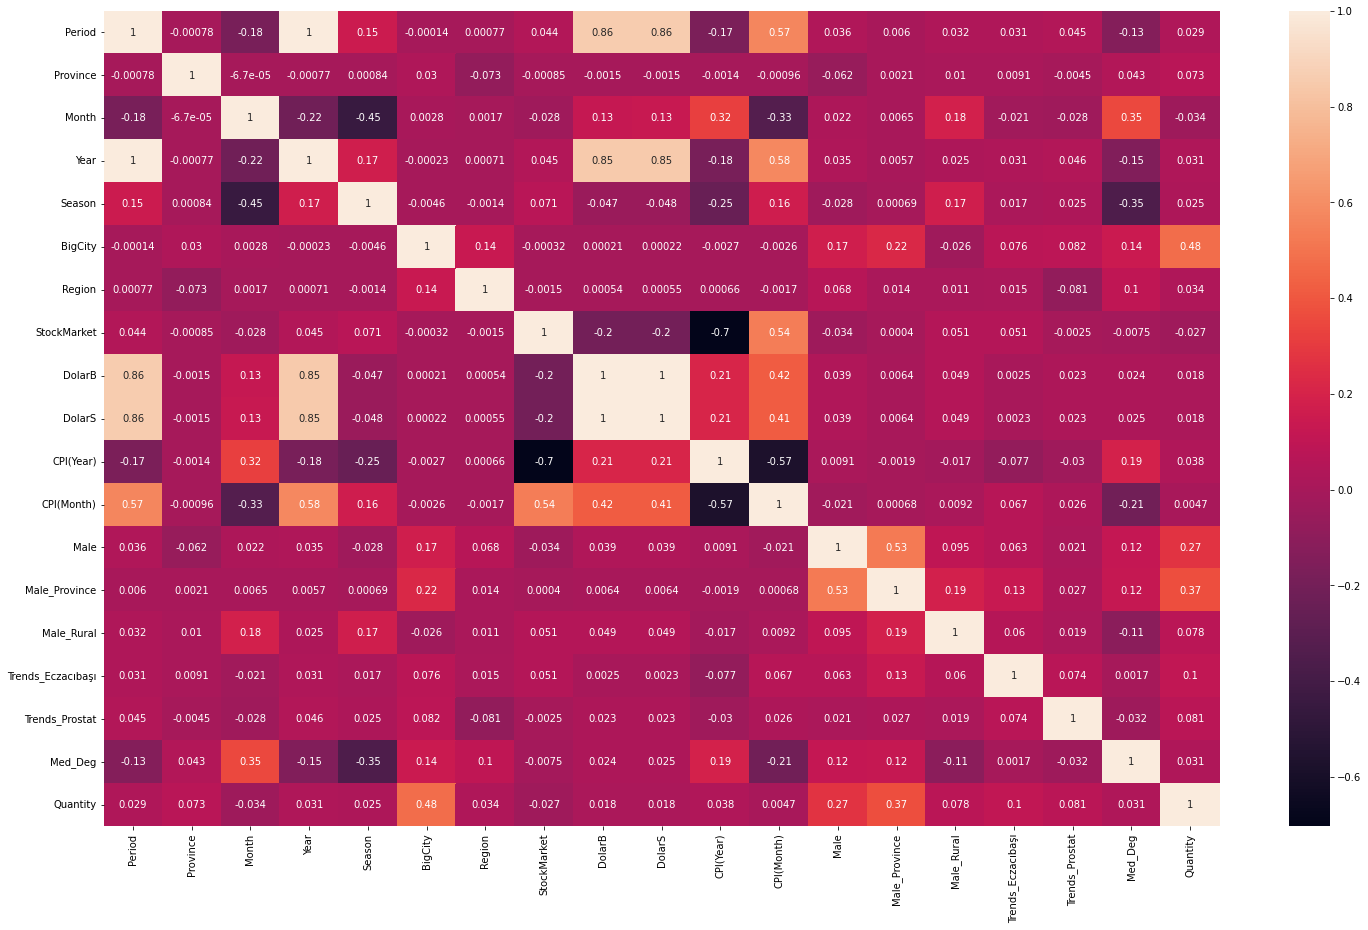

In [ ]:
# Heatmap Correlation:

ProductX_corr = ProductX.copy()

# Dealing with categorical imputs:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
ProductX_corr['Province'] = labelencoder.fit_transform(ProductX_corr['Province'].values)
ProductX_corr['Season'] = labelencoder.fit_transform(ProductX_corr['Season'].values)
ProductX_corr['Region'] = labelencoder.fit_transform(ProductX_corr['Region'].values)

def show_correlations(df, show_chart = True):
    fig = plt.figure(figsize = (25,15))
    corr = df.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

show_correlations(ProductX_corr)

# It is aimed to see the correlation between different parameters with each other and the Quantity value. 

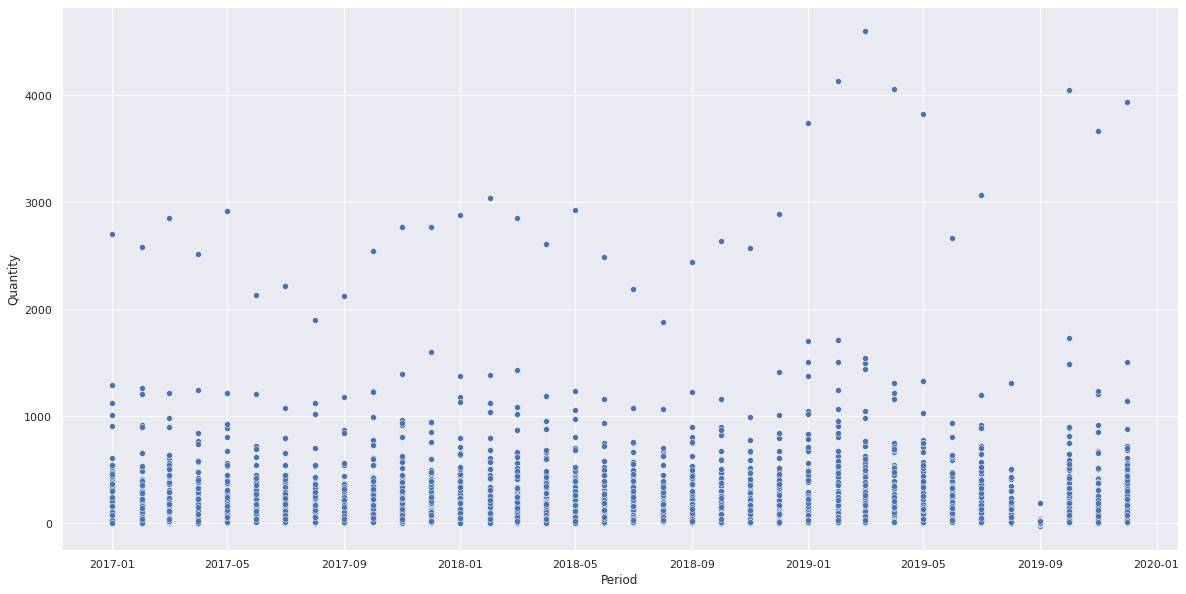

In [ ]:
ProductX['Period'].apply(str)
ProductX['Period'] = pd.to_datetime(ProductX['Period'], format = "%Y%m")

sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(data=ProductX, x='Period', y='Quantity', legend=False, sizes=(10,200))

# Theoutliers can affect the results significantly. In this section it is aimed to whether eliminate or not the outliers. In later stages of analyzes it can be seen that holding outliers gives more reasonable results.

Dealing with Variables:

*   CPI(Year) and Borsa features show high correlation with each other. Beacuse of that the feature (Borsa) which correlates weaker with "Quantity" got eliminated.
*   DolarB and DolarS features show high correlation with each other. Beacuse of that one of them (DolarB) got eliminated.
*   Since the predictions are desired to be made without Province variable it's also got eliminated.
* Since te Season variable also shows weak correlation with Quantity, it's also got eliminated.
*   Since Male, Male_Province and Male_Rural almost indicates the same thing, Male and Male_Rural variables eliminated due to lower correlation with Quantity.

In [ ]:
# Giving Back products:

df_givingback= ProductX.loc[ProductX['Quantity']<0]
df_givingback

,Period,Province,Month,Year,Season,BigCity,Region,StockMarket,DolarB,DolarS,CPI(Year),CPI(Month),Male,Male_Province,Male_Rural,Trends_Eczacıbaşı,Trends_Prostat,Med_Deg,Quantity
1315,2018-05-01,Gümüşhane,5,2018,spring,0,BS,2.999,4.4342,4.4422,12.15,1.62,84585.0,52299.0,32286.0,0,0,15.2,-2.0
2584,2019-09-01,Bilecik,9,2019,fall,0,MA,3.070,5.7047,5.7150,9.26,0.99,61485.0,92273.0,20978.0,0,0,19.2,-6.0
2588,2019-09-01,Çanakkale,9,2019,fall,0,MA,3.070,5.7047,5.7150,9.26,0.99,1216490.0,163780.0,108566.0,0,0,23.4,-1.0
2595,2019-09-01,Erzurum,9,2019,fall,1,EA,3.070,5.7047,5.7150,9.26,0.99,185788.0,380779.0,0.0,0,0,14.5,-22.0
2612,2019-09-01,Kırıkkale,9,2019,fall,0,CE,3.070,5.7047,5.7150,9.26,0.99,152694.0,132337.0,52761.0,0,38,20.7,-7.0
2620,2019-09-01,Mardin,9,2019,fall,1,SE,3.070,5.7047,5.7150,9.26,0.99,542072.0,916076.0,0.0,0,0,25.8,-4.0


In [ ]:
df_givingback = df_givingback.groupby(['Year','Month','Province']).sum()
df_givingback

# In this section it is aimed to see the count of giving back products. Since they are not too many, it is decided to keep them.

BigCity  StockMarket  DolarB  DolarS  CPI(Year)  \
Year Month Province                                                     
2018 5     Gümüşhane        0        2.999  4.4342  4.4422      12.15   
2019 9     Bilecik          0        3.070  5.7047  5.7150       9.26   
           Erzurum          1        3.070  5.7047  5.7150       9.26   
           Kırıkkale        0        3.070  5.7047  5.7150       9.26   
           Mardin           1        3.070  5.7047  5.7150       9.26   
           Çanakkale        0        3.070  5.7047  5.7150       9.26   

                      CPI(Month)       Male  Male_Province  Male_Rural  \
Year Month Province                                                      
2018 5     Gümüşhane        1.62    84585.0        52299.0     32286.0   
2019 9     Bilecik          0.99    61485.0        92273.0     20978.0   
           Erzurum          0.99   185788.0       380779.0         0.0   
           Kırıkkale        0.99   152694.0       132337.0     52761.0   
           Mardin           0.99   542072.0       916076.0         0.0   
           Çanakkale        0.99  1216490.0       163780.0    108566.0   

                      Trends_Eczacıbaşı  Trends_Prostat  Med_Deg  Quantity  
Year Month Province                                                         
2018 5     Gümüşhane                  0               0     15.2      -2.0  
2019 9     Bilecik                    0               0     19.2      -6.0  
           Erzurum                    0               0     14.5     -22.0  
           Kırıkkale                  0              38     20.7      -7.0  
           Mardin                     0               0     25.8      -4.0  
           Çanakkale                  0               0     23.4      -1.0

***VISUALIZATION*** 

In [ ]:
a = ProductX.groupby('Region')["Quantity"].sum()
regionDf = a.to_frame().reset_index()

Text(0, 0.5, 'Quantity')

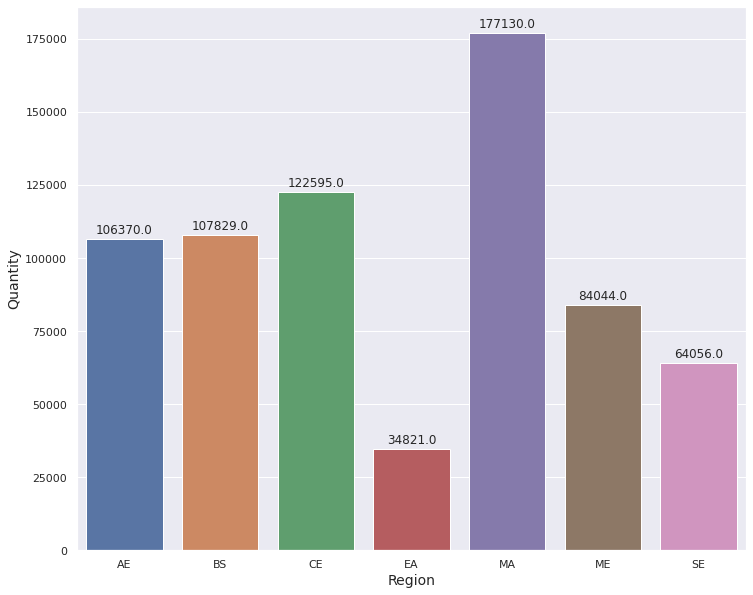

In [ ]:
# Bar plot of Quantity-Region for three years period.

plt.figure(figsize=(12, 10), facecolor="white")
splot=sns.barplot(x="Region",y="Quantity",data=regionDf,)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Region", size=14)
plt.ylabel("Quantity", size=14)


In [ ]:
yearBased = ProductX.groupby(["Year","Month"])["Quantity"].sum()
yearBased = yearBased.to_frame().reset_index()

In [ ]:
year2017 = yearBased.loc[yearBased['Year'] == 2017]
year2018 = yearBased.loc[yearBased['Year'] == 2018]
year2019 = yearBased.loc[yearBased['Year'] == 2019]

Text(0, 0.5, 'Quantity')

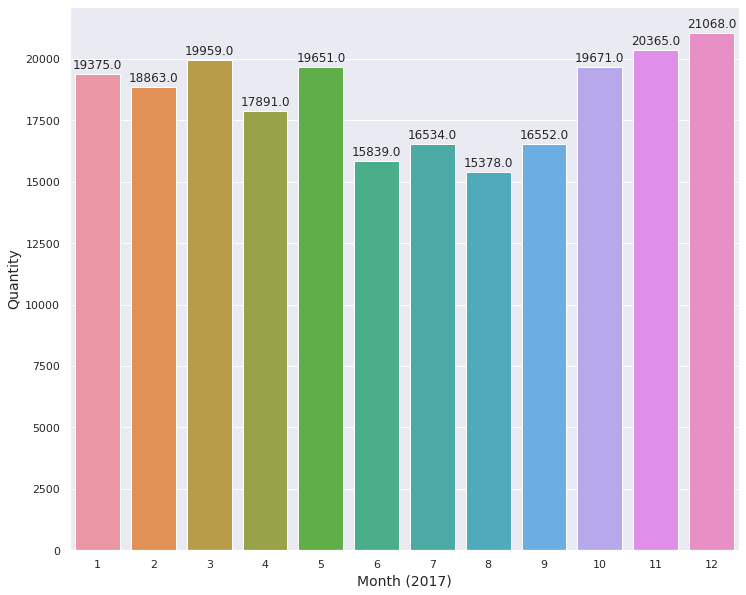

In [ ]:
# Bar plot of Quantity-Region for the year 2017.

plt.figure(figsize=(12, 10))
splot=sns.barplot(x="Month",y="Quantity",data=year2017)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Month (2017)", size=14)
plt.ylabel("Quantity", size=14)

Text(0, 0.5, 'Quantity')

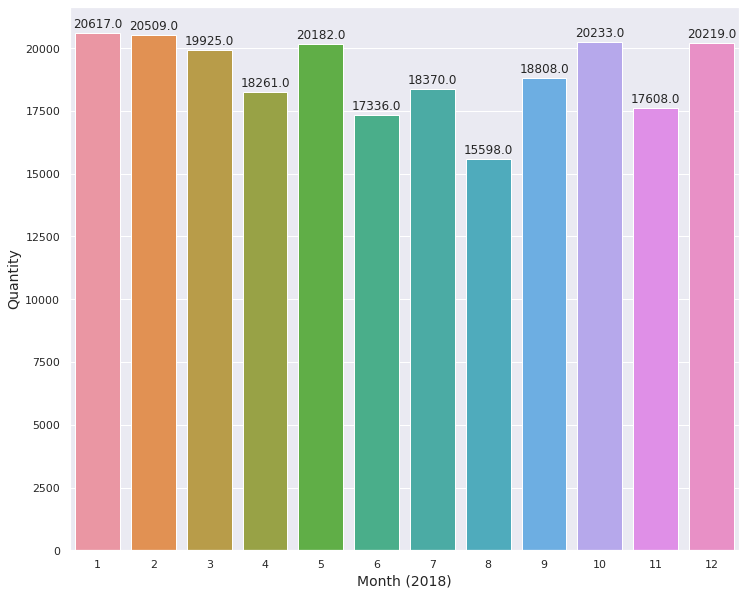

In [ ]:
# Bar plot of Quantity-Region for the year 2018.

plt.figure(figsize=(12, 10))
splot=sns.barplot(x="Month",y="Quantity",data=year2018)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Month (2018)", size=14)
plt.ylabel("Quantity", size=14)

Text(0, 0.5, 'Quantity')

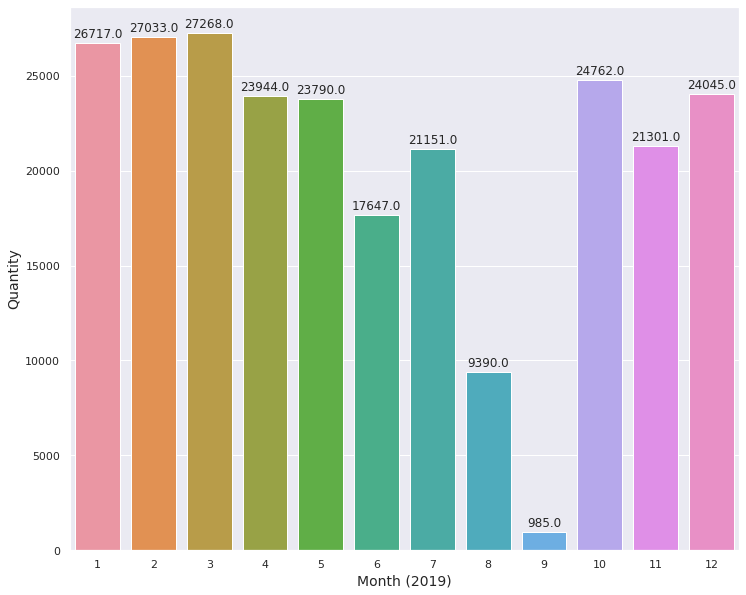

In [ ]:
# Bar plot of Quantity-Region for the year 2019.

plt.figure(figsize=(12, 10))
splot=sns.barplot(x="Month",y="Quantity",data=year2019)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Month (2019)", size=14)
plt.ylabel("Quantity", size=14)

It can be seen that from the year 2017 to 2019 Product X sold more every year except the excessive decrease on 08-2019 and 09-2019. As a result of the researches, it was thought that a product group similar to Product X was recalled from the market.

In [ ]:
def yearBasedSales(data):  
  plt.figure(figsize=(8, 6))
  splot=sns.barplot(x="Month",y="Quantity",data=data)
  for p in splot.patches:
      splot.annotate(format(p.get_height(), '.1f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
  plt.xlabel("Region", size=14)
  plt.ylabel("Quantity", size=14)

<Figure size 2880x1440 with 0 Axes>

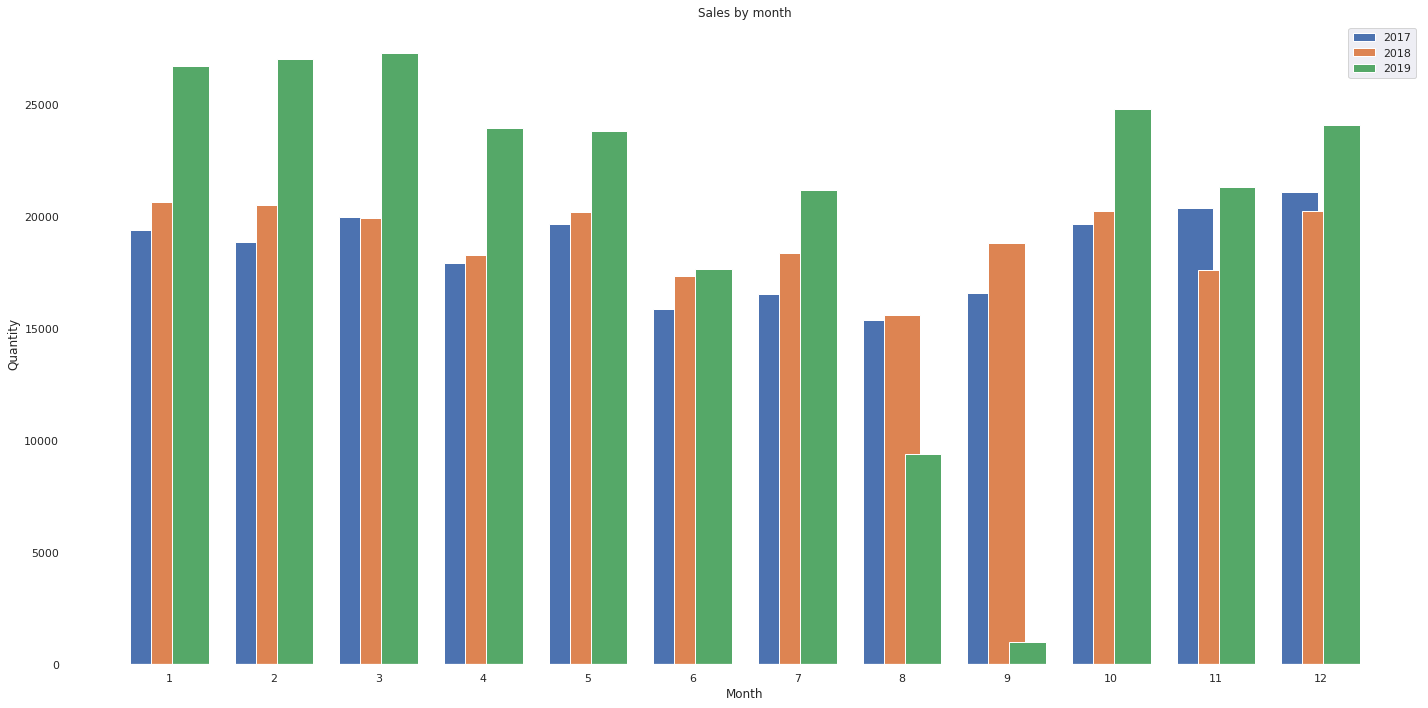

In [ ]:
labels = ['1', '2', '3', '4', '5','6','7','8','9','10','11','12']
sale2017 = year2017['Quantity'].to_list()
sale2018 = year2018['Quantity'].to_list()
sale2019 = year2019['Quantity'].to_list()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(40,20))
fig, ax = plt.subplots()


rects1 = ax.bar(x-0.2,sale2017, width, label='2017')
rects2 = ax.bar(x, sale2018, width, label='2018')
rects3 = ax.bar(x+0.2, sale2019, width, label='2019')
# Add some text for labels, title and custom x-axis tick labels, etc.
# tick labels, etc.
ax.set_ylabel('Quantity')
ax.set_xlabel('Month')
ax.grid(False)
ax.set_facecolor('white')
ax.set_title('Sales by month')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()


As can be seen from the graph above, an increasing trend is observed in the sales of product X.

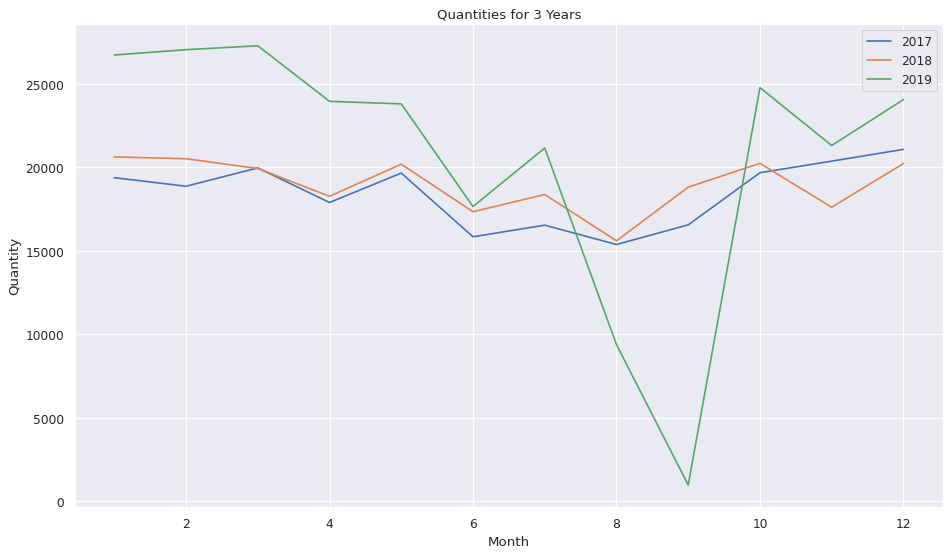

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(14, 8), dpi=80)
plt.plot(year2017['Month'],year2017['Quantity'], label = "2017")
plt.plot(year2018['Month'], year2018['Quantity'], label = "2018")
plt.plot(year2019['Month'], year2019['Quantity'], label = "2019")
plt.title('Quantities for 3 Years')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.legend()
plt.show()

The sudden decrease mentioned above can be seen quite clearly in this chart.

In [ ]:
provinceBased = ProductX.groupby(["Province"])["Quantity"].sum()
provinceBased = provinceBased.to_frame().reset_index()
provinceBased= provinceBased.sort_values(by=['Quantity'], ascending=False)
provinceBased = provinceBased[:10]

In [ ]:
provinceBased

,Province,Quantity
77,İstanbul,100631.0
5,Ankara,43474.0
29,Gaziantep,35620.0
78,İzmir,32752.0
44,Konya,25282.0
9,Aydın,24297.0
0,Adana,23507.0
61,Samsun,17604.0
41,Kayseri,17209.0
6,Antalya,16949.0


Text(0, 0.5, 'Quantity')

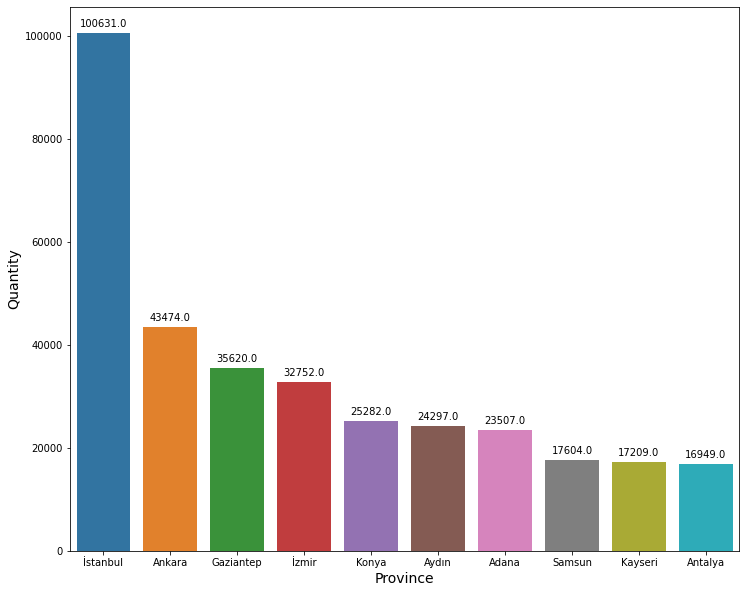

In [ ]:
# Bar plot of Quantity-Province for three-year period. It can be seen that densely populated metropolitan areas like Istanbul, Ankara, Gaziantep etc. are on the top of the most-sold list.

plt.figure(figsize=(12, 10))
plt.style.use('default')
splot=sns.barplot(x="Province",y="Quantity",data=provinceBased)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.xlabel("Province", size=14)
plt.ylabel("Quantity", size=14)



In [ ]:
provinceBased = ProductX.groupby(["Province"])["Quantity"].sum()
provinceBased = provinceBased.to_frame().reset_index()
provinceBased= provinceBased.sort_values(by=['Quantity'], ascending=False)
provinceBased = provinceBased[:10]

In [ ]:
provinceBased = ProductX.groupby(["Province","Year"])["Quantity"].sum()
provinceBased = provinceBased.to_frame().reset_index()

In [ ]:
provinceBased2017 = provinceBased.loc[provinceBased['Year'] == 2017]
provinceBased2017= provinceBased2017.sort_values(by=['Quantity'], ascending=False)
provinceBased2017 = provinceBased2017[:10]
provinceBased2017

,Province,Year,Quantity
308,İstanbul,2017,29996.0
20,Ankara,2017,14902.0
116,Gaziantep,2017,11636.0
312,İzmir,2017,10466.0
0,Adana,2017,8618.0
36,Aydın,2017,7767.0
176,Konya,2017,7052.0
24,Antalya,2017,5831.0
80,Bursa,2017,5339.0
200,Manisa,2017,5298.0


In [ ]:
provinceBased2018 = provinceBased.loc[provinceBased['Year'] == 2018]
provinceBased2018= provinceBased2018.sort_values(by=['Quantity'], ascending=False)
provinceBased2018 = provinceBased2018[:10]
provinceBased2018

,Province,Year,Quantity
309,İstanbul,2018,31410.0
21,Ankara,2018,14295.0
117,Gaziantep,2018,11547.0
313,İzmir,2018,10303.0
177,Konya,2018,9221.0
37,Aydın,2018,7996.0
1,Adana,2018,7180.0
165,Kayseri,2018,6604.0
25,Antalya,2018,5999.0
81,Bursa,2018,5458.0


In [ ]:
provinceBased2019 = provinceBased.loc[provinceBased['Year'] == 2019]
provinceBased2019 = provinceBased2019.sort_values(by=['Quantity'], ascending=False)
provinceBased2019 = provinceBased2019[:10]
provinceBased2019

,Province,Year,Quantity
310,İstanbul,2019,39225.0
22,Ankara,2019,14277.0
118,Gaziantep,2019,12437.0
314,İzmir,2019,11983.0
178,Konya,2019,9009.0
38,Aydın,2019,8534.0
2,Adana,2019,7709.0
246,Samsun,2019,7145.0
202,Manisa,2019,6443.0
166,Kayseri,2019,6336.0


Text(0, 0.5, 'Quantity')

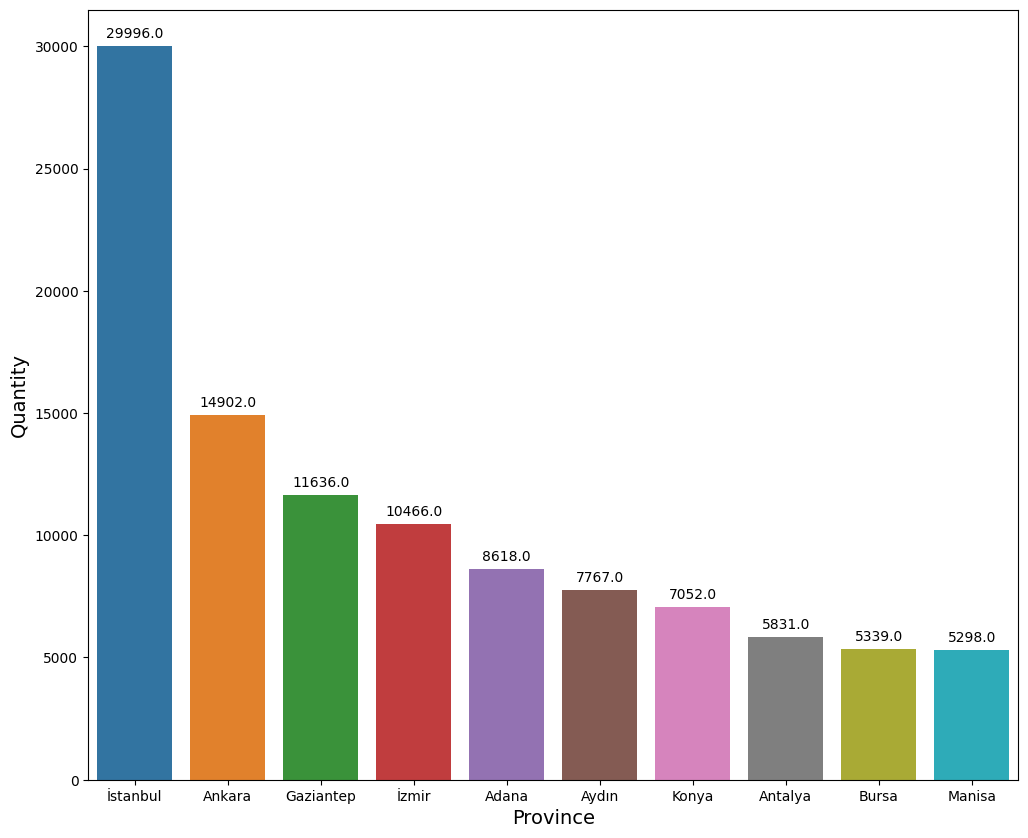

In [ ]:
# Bar plot of Quantity-Province for the year 2017.

plt.figure(figsize=(12, 10))
splot=sns.barplot(x="Province",y="Quantity",data=provinceBased2017)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Province", size=14)
plt.ylabel("Quantity", size=14)

Text(0, 0.5, 'Quantity')

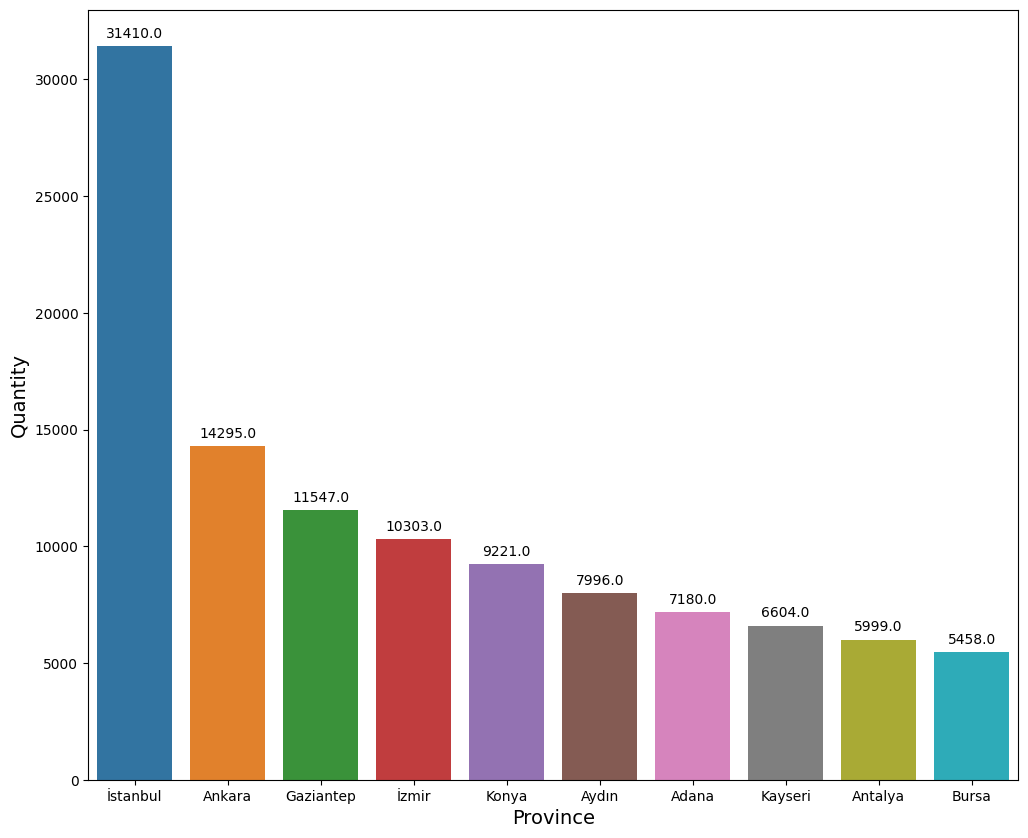

In [ ]:
# Bar plot of Quantity-Province for the year 2018.

plt.figure(figsize=(12, 10))
splot=sns.barplot(x="Province",y="Quantity",data=provinceBased2018)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Province", size=14)
plt.ylabel("Quantity", size=14)

Text(0, 0.5, 'Quantity')

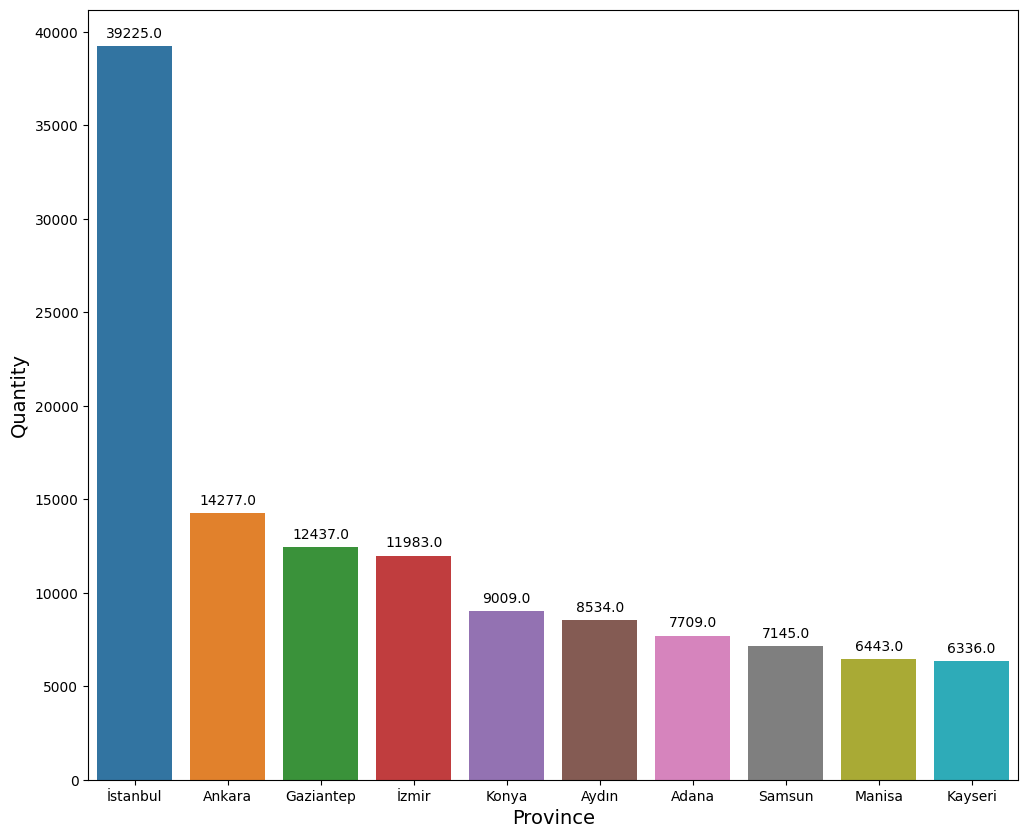

In [ ]:
# Bar plot of Quantity-Province for the year 2019.

plt.figure(figsize=(12, 10))
splot=sns.barplot(x="Province",y="Quantity",data=provinceBased2019)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Province", size=14)
plt.ylabel("Quantity", size=14)

In this section, it is aimed to show the sales of Product X on the map of Turkey.

In [ ]:
df_tr_map = pd.read_csv('gdrive/My Drive/VitrA/Product_X_ALL_LAST.csv', sep=";")

In [ ]:
df_tr_map.rename(columns={ df_tr_map.columns[1]: "Province" }, inplace = True)

In [ ]:
response = requests.get('https://gist.githubusercontent.com/mebaysan/9be56dd1ca5659c0ff7ea5e2b5cf6479/raw/6d7a77d8a2892bd59f401eb87bd82d7f48642a58/turkey-geojson.json')

In [ ]:
geojson = response.json()

In [ ]:
geoDict = {}
for i in geojson['features']:
    geoDict[i['properties']['name']] = i['id']

In [ ]:
ProductVmap = df_tr_map.groupby(['Province','Year'])['Quantity'].sum()
ProductVmap = ProductVmap.reset_index()
ProductVmap17 = ProductVmap[ProductVmap['Year']==2017].groupby(['Province'])['Quantity'].sum()
ProductVmap17 = ProductVmap17.reset_index()
ProductVmap18 = ProductVmap[ProductVmap['Year']==2018].groupby(['Province'])['Quantity'].sum()
ProductVmap18 = ProductVmap18.reset_index()
ProductVmap19 = ProductVmap[ProductVmap['Year']==2019].groupby(['Province'])['Quantity'].sum()
ProductVmap19 = ProductVmap19.reset_index()

In [ ]:
ProductVmap['GeoID'] = ProductVmap['Province'].str.capitalize().apply(lambda x: geoDict[x])

ProductVmap17['GeoID'] = ProductVmap17['Province'].str.capitalize().apply(lambda x: geoDict[x])
ProductVmap18['GeoID'] = ProductVmap18['Province'].str.capitalize().apply(lambda x: geoDict[x])
ProductVmap19['GeoID'] = ProductVmap19['Province'].str.capitalize().apply(lambda x: geoDict[x])

In [ ]:
fig = px.choropleth_mapbox(
ProductVmap17,  
geojson=geojson,
locations='GeoID',
color='Quantity',                           
color_continuous_scale="Viridis", 
center={'lat': 38.7200, 'lon': 34.0000},
labels={'Quantity': 'Quantity'},
mapbox_style="carto-positron",
zoom=4.8,
opacity=0.5,
custom_data=[ProductVmap17['Province'],
ProductVmap17['Quantity']]
)
# Some make-up for plot
fig.update_layout(
title='Quantity Ordered From Each Province for Product X - 2017',
title_x=0.5
)
# I created my own hover template for on hover event
hovertemp = '<i style="color:red;">Province:</i> %{customdata[0]}<br>'
hovertemp += '<i>Quantity:</i> %{customdata[1]:,f}<br>'
# I set my own hover template
fig.update_traces(hovertemplate=hovertemp) 
fig.show()

In [ ]:
fig = px.choropleth_mapbox(
ProductVmap18,  
geojson=geojson,
locations='GeoID',
color='Quantity',                           
color_continuous_scale="Viridis", 
center={'lat': 38.7200, 'lon': 34.0000},
labels={'Quantity': 'Quantity'},
mapbox_style="carto-positron",
zoom=4.8,
opacity=0.5,
custom_data=[ProductVmap18['Province'],
ProductVmap18['Quantity']]
)
# Some make-up for plot
fig.update_layout(
title='Quantity Ordered From Each Province for Product X - 2018',
title_x=0.5
)
# I created my own hover template for on hover event
hovertemp = '<i style="color:red;">Province:</i> %{customdata[0]}<br>'
hovertemp += '<i>Quantity:</i> %{customdata[1]:,f}<br>'
# I set my own hover template
fig.update_traces(hovertemplate=hovertemp) 
fig.show()

In [ ]:
fig = px.choropleth_mapbox(
ProductVmap19,  
geojson=geojson,
locations='GeoID',
color='Quantity',                           
color_continuous_scale="Viridis", 
center={'lat': 38.7200, 'lon': 34.0000},
labels={'Quantity': 'Quantity'},
mapbox_style="carto-positron",
zoom=4.8,
opacity=0.5,
custom_data=[ProductVmap19['Province'],
ProductVmap19['Quantity']]
)
# Some make-up for plot
fig.update_layout(
title='Quantity Ordered From Each Province for Product X - 2019',
title_x=0.5
)
# I created my own hover template for on hover event
hovertemp = '<i style="color:red;">Province:</i> %{customdata[0]}<br>'
hovertemp += '<i>Quantity:</i> %{customdata[1]:,f}<br>'
# I set my own hover template
fig.update_traces(hovertemplate=hovertemp) 
fig.show()

In [ ]:
# Dealing with categorical imputs:

# Since machine learning algorithms cannot work with categorical variables, they have been transformed into numerical type with the "label encoding" method.
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

ProductX['Province'] = labelencoder.fit_transform(ProductX['Province'].values)
ProductX['Season'] = labelencoder.fit_transform(ProductX['Season'].values)
ProductX['Region'] = labelencoder.fit_transform(ProductX['Region'].values)

In [ ]:
ProductX.dtypes

Period               datetime64[ns]
Province                      int64
Month                         int64
Year                          int64
Season                        int64
BigCity                       int64
Region                        int64
StockMarket                 float64
DolarB                      float64
DolarS                      float64
CPI(Year)                   float64
CPI(Month)                  float64
Male                        float64
Male_Province               float64
Male_Rural                  float64
Trends_Eczacıbaşı             int64
Trends_Prostat                int64
Med_Deg                     float64
Quantity                    float64
dtype: object

*Creating Subdatasets:*

In this section it is aimed to create different datasets with different input variables. Since the different variables with different correlations can affect the results significantly, the least correlated variables wtih Quantity value elimiated from datasets.

In [ ]:
ProductX.columns

Index(['Period', 'Province', 'Month', 'Year', 'Season', 'BigCity', 'Region',
       'StockMarket', 'DolarB', 'DolarS', 'CPI(Year)', 'CPI(Month)', 'Male',
       'Male_Province', 'Male_Rural', 'Trends_Eczacıbaşı', 'Trends_Prostat',
       'Med_Deg', 'Quantity'],
      dtype='object')

In [ ]:
##################--- DataFrames for Train ---##################

# Dataset with all variables:
X_1 = ProductX.iloc[:2881, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 ,13, 14, 15, 16, 17]].values
y_1 = ProductX.iloc[:2881, 18].values

# Dataset which excluded the Period, DolarB, Male_Rural variables:
X_2 = ProductX.iloc[:2881, [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12 ,13, 15, 16, 17]].values
y_2 = ProductX.iloc[:2881, 18].values

# Dataset which excluded the Period, Province, DolarB, Male_Rural variables:
X_3 = ProductX.iloc[:2881, [2, 3, 4, 5, 6, 7, 9, 10, 11, 12 ,13, 15, 16, 17]].values
y_3 = ProductX.iloc[:2881, 18].values

# Dataset which excluded the Period, Province, DolarB, Borsa, Male_Rural variables:
X_4 = ProductX.iloc[:2881, [2, 3, 4, 5, 6, 9, 10, 11 ,12, 13, 15, 16, 17]].values
y_4 = ProductX.iloc[:2881, 18].values

# Dataset which excluded the Period, Province, DolarB, Borsa, Male, Male_Rural variables:
X_5 = ProductX.iloc[:2881, [2, 3, 4, 5, 6, 9, 10, 11 ,13, 15, 16, 17]].values
y_5 = ProductX.iloc[:2881, 18].values

##################--- DataFrames for Test ---##################

# Dataset with all variables:
X_1_2020 = ProductX.iloc[2881:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 ,13, 14, 15, 16, 17]].values
y_1_2020 = ProductX.iloc[2881:, 18].values

# Dataset which excluded the Period, DolarB, Male_Rural variables:
X_2_2020 = ProductX.iloc[2881:, [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12 ,13, 15, 16, 17]].values
y_2_2020 = ProductX.iloc[2881:, 18].values

# Dataset which excluded the Period, Province, DolarB, Male_Rural variables:
X_3_2020 = ProductX.iloc[2881:, [2, 3, 4, 5, 6, 7, 9, 10, 11, 12 ,13, 15, 16, 17]].values
y_3_2020 = ProductX.iloc[2881:, 18].values

# Dataset which excluded the Period, Province, DolarB, Borsa, Male_Rural variables:
X_4_2020 = ProductX.iloc[:2881, [2, 3, 4, 5, 6, 9, 10, 11 ,12, 13, 15, 16, 17]].values
y_4_2020 = ProductX.iloc[:2881, 18].values

# Dataset which excluded the Period, Province, DolarB, Borsa, Male, Male_Rural variables:
X_5_2020 = ProductX.iloc[2881:, [2, 3, 4, 5, 6, 9, 10, 11 ,13, 15, 16, 17]].values
y_5_2020 = ProductX.iloc[2881:, 18].values

Since the distributions of the datas are quite different, the input parameters must be brought to the same scale in order for the results to be more reliable. Therefore, in this section, the training and test data  are scaled to scatter around 0, but 2020 datas:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_1 = scaler.fit_transform(X_1)
X_2 = scaler.fit_transform(X_2)
X_3 = scaler.fit_transform(X_3)
X_4 = scaler.fit_transform(X_4)
X_5 = scaler.fit_transform(X_5)

X_1_2020 = scaler.fit_transform(X_1_2020)
X_2_2020 = scaler.fit_transform(X_2_2020)
X_3_2020 = scaler.fit_transform(X_3_2020)
X_4_2020 = scaler.fit_transform(X_4_2020)
X_5_2020 = scaler.fit_transform(X_5_2020)

In [ ]:
# Splitting dataset:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, shuffle=False, random_state = 42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, shuffle=False, random_state = 42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.3, shuffle=False, random_state = 42)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.3, shuffle=False, random_state = 42)
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size=0.3, shuffle=False, random_state = 42)

*Machine Learning Algorithms*

In [ ]:
# The distribution of the actual values and the predictions made by the algorithms is intended to be shown not only with numerical error metrics, but also with visual graphics:

def predVisualization(test_pred,y_test):
  x_ax = range(len(test_pred))
  figure(figsize=(50, 10), dpi=80)
  plt.scatter(x_ax, y_test, lw=6, color="blue", label="original")
  plt.scatter(x_ax, test_pred, lw=4, color="red", label="predicted_rtc")
  plt.legend()
  plt.style.use('default')
  plt.show()

In [ ]:
# Differnce between :

def errorVisualization(test_pred,y_test):
  diffs = abs(test_pred-y_test)
  x_ax = range(len(test_pred))
  figure(figsize=(50, 10), dpi=80)
  plt.style.use('default')
  plt.plot(x_ax, test_pred-y_test, lw=6, color="blue", label="difference")
  plt.legend()
  plt.show()

In [ ]:
def ml_algorithms(X_train, y_train, X_test, y_test, X_pred):
  
  # Linear Regression:

  linear_reg = LinearRegression()
  model_lr = linear_reg.fit(X_train, y_train)
  train_preds_LinReg = linear_reg.predict(X_train)
  test_preds_LinReg = linear_reg.predict(X_test)

  mae_linReg_train = mean_absolute_error(y_train, train_preds_LinReg)
  mae_linReg_test = mean_absolute_error(y_test, test_preds_LinReg)

  mse_linReg_train = mean_squared_error(y_train, train_preds_LinReg)
  mse_linReg_test = mean_squared_error(y_test, test_preds_LinReg) 

  rmse_linReg_train = mean_squared_error(y_train, train_preds_LinReg, squared=False)
  rmse_linReg_test = mean_squared_error(y_test, test_preds_LinReg, squared=False)

  r2_linReg_train = r2_score(y_train, train_preds_LinReg)
  r2_linReg_test = r2_score(y_test, test_preds_LinReg)

  explained_variance_linreg_train = explained_variance_score(y_train, train_preds_LinReg)
  explained_variance_linreg_test = explained_variance_score(y_test, test_preds_LinReg)

  CoV_train_linreg = rmse_linReg_train/np.mean(y_train)
  CoV_test_linreg = rmse_linReg_test/np.mean(y_test)

  predictions2020_lin_reg = linear_reg.predict(X_pred)
  df = pd.DataFrame(predictions2020_lin_reg, columns=['2020_Predictions'])  
  df_linReg_2020_01 = df.iloc[0:81,:].values
  df_linReg_2020_02 = df.iloc[81:163,:].values
  df_linReg_2020_03 = df.iloc[162:244,:].values
  df_linReg_2020_04 = df.iloc[244:325,:].values
  df_linReg_2020_01 = (pd.DataFrame(df_linReg_2020_01)).sum() 
  df_linReg_2020_02 = (pd.DataFrame(df_linReg_2020_02)).sum() 
  df_linReg_2020_03 = (pd.DataFrame(df_linReg_2020_03)).sum() 
  df_linReg_2020_04 = (pd.DataFrame(df_linReg_2020_04)).sum()

  ######################################################

  # KNN:

  knn_reg = KNeighborsRegressor()
  model_knn = knn_reg.fit(X_train, y_train)
  train_preds_knn_reg  = knn_reg.predict(X_train)
  test_preds_knn_reg = knn_reg.predict(X_test)

  mae_knn_reg_train = mean_absolute_error(y_train, train_preds_knn_reg)
  mae_knn_reg_test = mean_absolute_error(y_test, test_preds_knn_reg)

  mse_knn_reg_train = mean_squared_error(y_train, train_preds_knn_reg)
  mse_knn_reg_test = mean_squared_error(y_test, test_preds_knn_reg) 

  rmse_knn_reg_train = mean_squared_error(y_train, train_preds_knn_reg , squared=False)
  rmse_knn_reg_test = mean_squared_error(y_test, test_preds_knn_reg, squared=False)

  r2_knn_reg_train = r2_score(y_train, train_preds_knn_reg)
  r2_knn_reg_test = r2_score(y_test, test_preds_knn_reg)

  explained_variance_knn_train = explained_variance_score(y_train, train_preds_knn_reg)
  explained_variance_knn_test = explained_variance_score(y_test, test_preds_knn_reg)

  CoV_train_knn = rmse_knn_reg_train/np.mean(y_train)
  CoV_test_knn = rmse_knn_reg_test/np.mean(y_test)

  predictions2020_knn_reg = knn_reg.predict(X_pred)
  df_knn = pd.DataFrame(predictions2020_knn_reg, columns=['2020_Predictions'])  
  df_knn_2020_01 = df_knn.iloc[0:81,:].values
  df_knn_2020_02 = df_knn.iloc[81:163,:].values
  df_knn_2020_03 = df_knn.iloc[162:244,:].values
  df_knn_2020_04 = df_knn.iloc[244:325,:].values
  df_knn_2020_01 = (pd.DataFrame(df_knn_2020_01)).sum() 
  df_knn_2020_02 = (pd.DataFrame(df_knn_2020_02)).sum() 
  df_knn_2020_03 = (pd.DataFrame(df_knn_2020_03)).sum() 
  df_knn_2020_04 = (pd.DataFrame(df_knn_2020_04)).sum()

  ######################################################

  # XGBoost:

  xgb_reg = XGBRegressor(objective='reg:squarederror')
  model_xgb = xgb_reg.fit(X_train, y_train)
  train_preds_xgb_reg  = xgb_reg.predict(X_train)
  test_preds_xgb_reg = xgb_reg.predict(X_test)

  mae_xgb_reg_train = mean_absolute_error(y_train, train_preds_xgb_reg)
  mae_xgb_reg_test = mean_absolute_error(y_test, test_preds_xgb_reg)

  mse_xgb_reg_train = mean_squared_error(y_train, train_preds_xgb_reg)
  mse_xgb_reg_test = mean_squared_error(y_test, test_preds_xgb_reg) 

  rmse_xgb_reg_train = mean_squared_error(y_train, train_preds_xgb_reg , squared=False)
  rmse_xgb_reg_test = mean_squared_error(y_test, test_preds_xgb_reg, squared=False)

  r2_xgb_reg_train = r2_score(y_train, train_preds_xgb_reg)
  r2_xgb_reg_test = r2_score(y_test, test_preds_xgb_reg)

  explained_variance_xgb_train = explained_variance_score(y_train, train_preds_xgb_reg)
  explained_variance_xgb_test = explained_variance_score(y_test, test_preds_xgb_reg)

  CoV_train_xgb = rmse_xgb_reg_train/np.mean(y_train)
  CoV_test_xgb = rmse_xgb_reg_test/np.mean(y_test)

  predictions2020_xgb_reg = xgb_reg.predict(X_pred)
  df_xgb = pd.DataFrame(predictions2020_xgb_reg, columns=['2020_Predictions'])  
  df_xgb_2020_01 = df_xgb.iloc[0:81,:].values
  df_xgb_2020_02 = df_xgb.iloc[81:163,:].values
  df_xgb_2020_03 = df_xgb.iloc[162:244,:].values
  df_xgb_2020_04 = df_xgb.iloc[244:325,:].values
  df_xgb_2020_01 = (pd.DataFrame(df_xgb_2020_01)).sum() 
  df_xgb_2020_02 = (pd.DataFrame(df_xgb_2020_02)).sum() 
  df_xgb_2020_03 = (pd.DataFrame(df_xgb_2020_03)).sum() 
  df_xgb_2020_04 = (pd.DataFrame(df_xgb_2020_04)).sum()

  ######################################################

  # Light GBM:

  lgbm_reg = ltb.LGBMRegressor()
  model_lgbm = lgbm_reg.fit(X_train, y_train)
  train_preds_lgbm_reg  = lgbm_reg.predict(X_train)
  test_preds_lgbm_reg = lgbm_reg.predict(X_test)

  mae_lgbm_reg_train = mean_absolute_error(y_train, train_preds_lgbm_reg)
  mae_lgbm_reg_test = mean_absolute_error(y_test, test_preds_lgbm_reg)

  mse_lgbm_reg_train = mean_squared_error(y_train, train_preds_lgbm_reg)
  mse_lgbm_reg_test = mean_squared_error(y_test, test_preds_lgbm_reg) 

  rmse_lgbm_reg_train = mean_squared_error(y_train, train_preds_lgbm_reg , squared=False)
  rmse_lgbm_reg_test = mean_squared_error(y_test, test_preds_lgbm_reg, squared=False)

  r2_lgbm_reg_train = r2_score(y_train, train_preds_lgbm_reg)
  r2_lgbm_reg_test = r2_score(y_test, test_preds_lgbm_reg)

  explained_variance_lgbm_train = explained_variance_score(y_train, train_preds_lgbm_reg)
  explained_variance_lgbm_test = explained_variance_score(y_test, test_preds_lgbm_reg)

  CoV_train_lgbm = rmse_lgbm_reg_train/np.mean(y_train)
  CoV_test_lgbm = rmse_lgbm_reg_test/np.mean(y_test)

  predictions2020_lgbm_reg = lgbm_reg.predict(X_pred)
  df_lgbm = pd.DataFrame(predictions2020_lgbm_reg, columns=['2020_Predictions'])  
  df_lgbm_2020_01 = df_lgbm.iloc[0:81,:].values
  df_lgbm_2020_02 = df_lgbm.iloc[81:163,:].values
  df_lgbm_2020_03 = df_lgbm.iloc[162:244,:].values
  df_lgbm_2020_04 = df_lgbm.iloc[244:325,:].values
  df_lgbm_2020_01 = (pd.DataFrame(df_lgbm_2020_01)).sum() 
  df_lgbm_2020_02 = (pd.DataFrame(df_lgbm_2020_02)).sum() 
  df_lgbm_2020_03 = (pd.DataFrame(df_lgbm_2020_03)).sum() 
  df_lgbm_2020_04 = (pd.DataFrame(df_lgbm_2020_04)).sum()

  ######################################################

  # Random Forest:

  rfr_reg = RandomForestRegressor()
  model_rfr = rfr_reg.fit(X_train, y_train)
  train_preds_rfr_reg  = rfr_reg.predict(X_train)
  test_preds_rfr_reg = rfr_reg.predict(X_test)

  mae_rfr_reg_train = mean_absolute_error(y_train, train_preds_rfr_reg)
  mae_rfr_reg_test = mean_absolute_error(y_test, test_preds_rfr_reg)

  mse_rfr_reg_train = mean_squared_error(y_train, train_preds_rfr_reg)
  mse_rfr_reg_test = mean_squared_error(y_test, test_preds_rfr_reg) 

  rmse_rfr_reg_train = mean_squared_error(y_train, train_preds_rfr_reg , squared=False)
  rmse_rfr_reg_test = mean_squared_error(y_test, test_preds_rfr_reg, squared=False)

  r2_rfr_reg_train = r2_score(y_train, train_preds_rfr_reg)
  r2_rfr_reg_test = r2_score(y_test, test_preds_rfr_reg)

  explained_variance_rfr_train = explained_variance_score(y_train, train_preds_rfr_reg)
  explained_variance_rfr_test = explained_variance_score(y_test, test_preds_rfr_reg)

  CoV_train_rfr = rmse_rfr_reg_train/np.mean(y_train)
  CoV_test_rfr = rmse_rfr_reg_test/np.mean(y_test)

  predictions2020_rfr_reg = rfr_reg.predict(X_pred)
  df_rfr = pd.DataFrame(predictions2020_rfr_reg, columns=['2020_Predictions'])  
  df_rfr_2020_01 = df_rfr.iloc[0:81,:].values
  df_rfr_2020_02 = df_rfr.iloc[81:163,:].values
  df_rfr_2020_03 = df_rfr.iloc[162:244,:].values
  df_rfr_2020_04 = df_rfr.iloc[244:325,:].values
  df_rfr_2020_01 = (pd.DataFrame(df_rfr_2020_01)).sum() 
  df_rfr_2020_02 = (pd.DataFrame(df_rfr_2020_02)).sum() 
  df_rfr_2020_03 = (pd.DataFrame(df_rfr_2020_03)).sum() 
  df_rfr_2020_04 = (pd.DataFrame(df_rfr_2020_04)).sum()

  ######################################################

  # Support Vector Regressor:

  svr_reg = SVR()
  model_svr = svr_reg.fit(X_train, y_train)
  train_preds_svr_reg  = svr_reg.predict(X_train)
  test_preds_svr_reg = svr_reg.predict(X_test)

  mae_svr_reg_train = mean_absolute_error(y_train, train_preds_svr_reg)
  mae_svr_reg_test = mean_absolute_error(y_test, test_preds_svr_reg)

  mse_svr_reg_train = mean_squared_error(y_train, train_preds_svr_reg)
  mse_svr_reg_test = mean_squared_error(y_test, test_preds_svr_reg) 

  rmse_svr_reg_train = mean_squared_error(y_train, train_preds_svr_reg , squared=False)
  rmse_svr_reg_test = mean_squared_error(y_test, test_preds_svr_reg, squared=False)

  r2_svr_reg_train = r2_score(y_train, train_preds_svr_reg)
  r2_svr_reg_test = r2_score(y_test, test_preds_svr_reg)

  explained_variance_svr_train = explained_variance_score(y_train, train_preds_svr_reg)
  explained_variance_svr_test = explained_variance_score(y_test, test_preds_svr_reg)

  CoV_train_svr = rmse_svr_reg_train/np.mean(y_train)
  CoV_test_svr = rmse_svr_reg_test/np.mean(y_test)

  predictions2020_svr_reg = svr_reg.predict(X_pred)
  df_svr = pd.DataFrame(predictions2020_svr_reg, columns=['2020_Predictions'])  
  df_svr_2020_01 = df_svr.iloc[0:81,:].values
  df_svr_2020_02 = df_svr.iloc[81:163,:].values
  df_svr_2020_03 = df_svr.iloc[162:244,:].values
  df_svr_2020_04 = df_svr.iloc[244:325,:].values
  df_svr_2020_01 = (pd.DataFrame(df_svr_2020_01)).sum() 
  df_svr_2020_02 = (pd.DataFrame(df_svr_2020_02)).sum() 
  df_svr_2020_03 = (pd.DataFrame(df_svr_2020_03)).sum() 
  df_svr_2020_04 = (pd.DataFrame(df_svr_2020_04)).sum()

  ######################################################

  # Gauss NB:

  gauss_reg = GaussianNB()
  model_gauss = gauss_reg.fit(X_train, y_train)
  train_preds_gauss_reg  = gauss_reg.predict(X_train)
  test_preds_gauss_reg = gauss_reg.predict(X_test)

  mae_gauss_reg_train = mean_absolute_error(y_train, train_preds_gauss_reg)
  mae_gauss_reg_test = mean_absolute_error(y_test, test_preds_gauss_reg)

  mse_gauss_reg_train = mean_squared_error(y_train, train_preds_gauss_reg)
  mse_gauss_reg_test = mean_squared_error(y_test, test_preds_gauss_reg) 

  rmse_gauss_reg_train = mean_squared_error(y_train, train_preds_gauss_reg , squared=False)
  rmse_gauss_reg_test = mean_squared_error(y_test, test_preds_gauss_reg, squared=False)

  r2_gauss_reg_train = r2_score(y_train, train_preds_gauss_reg)
  r2_gauss_reg_test = r2_score(y_test, test_preds_gauss_reg)

  explained_variance_gauss_train = explained_variance_score(y_train, train_preds_gauss_reg)
  explained_variance_gauss_test = explained_variance_score(y_test, test_preds_gauss_reg)

  CoV_train_gauss = rmse_gauss_reg_train/np.mean(y_train)
  CoV_test_gauss = rmse_gauss_reg_test/np.mean(y_test)

  predictions2020_gauss_reg = gauss_reg.predict(X_pred)
  df_gauss = pd.DataFrame(predictions2020_gauss_reg, columns=['2020_Predictions'])  
  df_gauss_2020_01 = df_gauss.iloc[0:81,:].values
  df_gauss_2020_02 = df_gauss.iloc[81:163,:].values
  df_gauss_2020_03 = df_gauss.iloc[162:244,:].values
  df_gauss_2020_04 = df_gauss.iloc[244:325,:].values
  df_gauss_2020_01 = (pd.DataFrame(df_gauss_2020_01)).sum() 
  df_gauss_2020_02 = (pd.DataFrame(df_gauss_2020_02)).sum() 
  df_gauss_2020_03 = (pd.DataFrame(df_gauss_2020_03)).sum() 
  df_gauss_2020_04 = (pd.DataFrame(df_gauss_2020_04)).sum()

  ######################################################

  # Decision Trees:

  dtr_reg = DecisionTreeRegressor()
  model_dtr = dtr_reg.fit(X_train, y_train)
  train_preds_dtr_reg  = dtr_reg.predict(X_train)
  test_preds_dtr_reg = dtr_reg.predict(X_test)

  mae_dtr_reg_train = mean_absolute_error(y_train, train_preds_dtr_reg)
  mae_dtr_reg_test = mean_absolute_error(y_test, test_preds_dtr_reg)

  mse_dtr_reg_train = mean_squared_error(y_train, train_preds_dtr_reg)
  mse_dtr_reg_test = mean_squared_error(y_test, test_preds_dtr_reg) 

  rmse_dtr_reg_train = mean_squared_error(y_train, train_preds_dtr_reg , squared=False)
  rmse_dtr_reg_test = mean_squared_error(y_test, test_preds_dtr_reg, squared=False)

  r2_dtr_reg_train = r2_score(y_train, train_preds_dtr_reg)
  r2_dtr_reg_test = r2_score(y_test, test_preds_dtr_reg)

  explained_variance_dtr_train = explained_variance_score(y_train, train_preds_dtr_reg)
  explained_variance_dtr_test = explained_variance_score(y_test, test_preds_dtr_reg)

  CoV_train_dtr = rmse_dtr_reg_train/np.mean(y_train)
  CoV_test_dtr = rmse_dtr_reg_test/np.mean(y_test)

  predictions2020_dtr_reg = dtr_reg.predict(X_pred)
  df_dtr = pd.DataFrame(predictions2020_dtr_reg, columns=['2020_Predictions'])  
  df_dtr_2020_01 = df_dtr.iloc[0:81,:].values
  df_dtr_2020_02 = df_dtr.iloc[81:163,:].values
  df_dtr_2020_03 = df_dtr.iloc[162:244,:].values
  df_dtr_2020_04 = df_dtr.iloc[244:325,:].values
  df_dtr_2020_01 = (pd.DataFrame(df_dtr_2020_01)).sum() 
  df_dtr_2020_02 = (pd.DataFrame(df_dtr_2020_02)).sum() 
  df_dtr_2020_03 = (pd.DataFrame(df_dtr_2020_03)).sum() 
  df_dtr_2020_04 = (pd.DataFrame(df_dtr_2020_04)).sum()

  ######################################################

  # Gradient Boosting:

  gbr_reg = GradientBoostingRegressor()
  model_gbr = gbr_reg.fit(X_train, y_train)
  train_preds_gbr_reg  = gbr_reg.predict(X_train)
  test_preds_gbr_reg = gbr_reg.predict(X_test)

  mae_gbr_reg_train = mean_absolute_error(y_train, train_preds_gbr_reg)
  mae_gbr_reg_test = mean_absolute_error(y_test, test_preds_gbr_reg)

  mse_gbr_reg_train = mean_squared_error(y_train, train_preds_gbr_reg)
  mse_gbr_reg_test = mean_squared_error(y_test, test_preds_gbr_reg) 

  rmse_gbr_reg_train = mean_squared_error(y_train, train_preds_gbr_reg , squared=False)
  rmse_gbr_reg_test = mean_squared_error(y_test, test_preds_gbr_reg, squared=False)

  r2_gbr_reg_train = r2_score(y_train, train_preds_gbr_reg)
  r2_gbr_reg_test = r2_score(y_test, test_preds_gbr_reg)

  explained_variance_gbr_train = explained_variance_score(y_train, train_preds_gbr_reg)
  explained_variance_gbr_test = explained_variance_score(y_test, test_preds_gbr_reg)

  CoV_train_gbr = rmse_gbr_reg_train/np.mean(y_train)
  CoV_test_gbr = rmse_gbr_reg_test/np.mean(y_test)

  predictions2020_gbr_reg = gbr_reg.predict(X_pred)
  df_gbr = pd.DataFrame(predictions2020_gbr_reg, columns=['2020_Predictions'])  
  df_gbr_2020_01 = df_gbr.iloc[0:81,:].values
  df_gbr_2020_02 = df_gbr.iloc[81:163,:].values
  df_gbr_2020_03 = df_gbr.iloc[162:244,:].values
  df_gbr_2020_04 = df_gbr.iloc[244:325,:].values
  df_gbr_2020_01 = (pd.DataFrame(df_gbr_2020_01)).sum()
  df_gbr_2020_02 = (pd.DataFrame(df_gbr_2020_02)).sum() 
  df_gbr_2020_03 = (pd.DataFrame(df_gbr_2020_03)).sum() 
  df_gbr_2020_04 = (pd.DataFrame(df_gbr_2020_04)).sum()

  results = pd.DataFrame({
      'Model': ['Linear Regression', 'KNN', 'XGBoost', 'Light GBM', 'Random Forest', 'Support Vector Machines', 'Gauss NB', 'Decision Trees', 'Gradient Boosting'],
      'Mean Absolute Error (Train)': [mae_linReg_train, mae_knn_reg_train, mae_xgb_reg_train, mae_lgbm_reg_train, mae_rfr_reg_train, mae_svr_reg_train, mae_gauss_reg_train, mae_dtr_reg_train, mae_gbr_reg_train],
      'Mean Absolute Error (Test)': [mae_linReg_test, mae_knn_reg_test, mae_xgb_reg_test, mae_lgbm_reg_test, mae_rfr_reg_test, mae_svr_reg_test, mae_gauss_reg_test, mae_dtr_reg_test, mae_gbr_reg_test],
      'Mean Squared Error (Train)': [mse_linReg_train, mse_knn_reg_train, mse_xgb_reg_train, mse_lgbm_reg_train, mse_rfr_reg_train, mse_svr_reg_train, mse_gauss_reg_train, mse_dtr_reg_train, mse_gbr_reg_train],
      'Mean Squared Error (Test)': [mse_linReg_test, mse_knn_reg_test, mse_xgb_reg_test, mse_lgbm_reg_test, mse_rfr_reg_test, mse_svr_reg_test, mse_gauss_reg_test, mse_dtr_reg_test, mse_gbr_reg_test],
      'Root Mean Squared Error (Train)': [rmse_linReg_train, rmse_knn_reg_train, rmse_xgb_reg_train, rmse_lgbm_reg_train, rmse_rfr_reg_train, rmse_svr_reg_train, rmse_gauss_reg_train, rmse_dtr_reg_train, rmse_gbr_reg_train],
      'Root Mean Squared Error (Test)': [rmse_linReg_test, rmse_knn_reg_test, rmse_xgb_reg_test, rmse_lgbm_reg_test, rmse_rfr_reg_test, rmse_svr_reg_test, rmse_gauss_reg_test, rmse_dtr_reg_test, rmse_gbr_reg_test],
      'R2 (Train)': [r2_linReg_train, r2_knn_reg_train, r2_xgb_reg_train, r2_lgbm_reg_train, r2_rfr_reg_train, r2_svr_reg_train, r2_gauss_reg_train, r2_dtr_reg_train, r2_gbr_reg_train],
      'R2 (Test)': [r2_linReg_test, r2_knn_reg_test, r2_xgb_reg_test, r2_lgbm_reg_test, r2_rfr_reg_test, r2_svr_reg_test, r2_gauss_reg_test, r2_dtr_reg_test, r2_gbr_reg_test],
      'Coefficient of Variance (Train)': [CoV_train_linreg, CoV_train_knn, CoV_train_xgb, CoV_train_lgbm, CoV_train_rfr, CoV_train_svr, CoV_train_gauss, CoV_train_dtr, CoV_train_gbr],
      'Coefficient of Variance (Test)': [CoV_test_linreg, CoV_test_knn, CoV_test_xgb, CoV_test_lgbm, CoV_test_rfr, CoV_test_svr, CoV_test_gauss, CoV_test_dtr, CoV_test_gbr]})
  
  result_df = results.sort_values(by='R2 (Test)', ascending=False)
  result_df = result_df.set_index('Model')
  return result_df

In [ ]:
result_df_1 = ml_algorithms(X_train_1, y_train_1, X_test_1, y_test_1, X_1_2020)
result_df_1

,Mean Absolute Error (Train),Mean Absolute Error (Test),Mean Squared Error (Train),Mean Squared Error (Test),Root Mean Squared Error (Train),Root Mean Squared Error (Test),R2 (Train),R2 (Test),Coefficient of Variance (Train),Coefficient of Variance (Test)
Model,,,,,,,,,,
Gradient Boosting,47.307821,118.438375,4932.125227,49120.352116,70.229091,221.631117,0.962368,0.761274,0.295334,0.881636
Random Forest,14.406989,124.530405,795.021806,51641.539436,28.196131,227.247749,0.993934,0.749021,0.118573,0.903979
XGBoost,48.669679,125.179907,5238.314478,54330.231752,72.376201,233.088463,0.960032,0.735954,0.304363,0.927213
Light GBM,24.594532,134.214660,1774.215933,54599.991493,42.121443,233.666411,0.986463,0.734643,0.177133,0.929512
KNN,109.676190,151.374104,41215.487500,82605.058173,203.015978,287.410957,0.685530,0.598538,0.853741,1.143305
Decision Trees,0.000000,177.005780,0.000000,89639.916763,0.000000,299.399260,1.000000,0.564349,0.000000,1.190994
Gauss NB,77.348710,169.353757,15143.125496,174132.079769,123.057407,417.291361,0.884459,0.153716,0.517492,1.659962
Support Vector Machines,165.317178,195.711651,129051.185638,208605.818470,359.236949,456.733860,0.015351,-0.013827,1.510696,1.816862
Linear Regression,152.006058,192.557968,86183.716183,216017.356508,293.570632,464.776674,0.342426,-0.049847,1.234550,1.848856


In [ ]:
result_df_2 = ml_algorithms(X_train_2, y_train_2, X_test_2, y_test_2, X_2_2020)
result_df_2

,Mean Absolute Error (Train),Mean Absolute Error (Test),Mean Squared Error (Train),Mean Squared Error (Test),Root Mean Squared Error (Train),Root Mean Squared Error (Test),R2 (Train),R2 (Test),Coefficient of Variance (Train),Coefficient of Variance (Test)
Model,,,,,,,,,,
Random Forest,13.950942,121.673341,757.798970,49855.212902,27.528149,223.282809,0.994218,0.757703,0.115764,0.888207
Gradient Boosting,46.387116,121.254707,4764.635461,50567.138894,69.026339,224.871383,0.963646,0.754243,0.290276,0.894526
Light GBM,24.376487,128.332568,1778.853950,52883.599334,42.176462,229.964344,0.986428,0.742985,0.177364,0.914785
XGBoost,48.283797,125.067762,5255.481786,53109.831691,72.494702,230.455704,0.959901,0.741886,0.304861,0.916740
KNN,109.111111,149.478150,42007.432778,78282.264092,204.957149,279.789678,0.679487,0.619547,0.861905,1.112988
Decision Trees,0.000000,183.877457,0.000000,118784.913295,0.000000,344.651873,1.000000,0.422704,0.000000,1.371006
Gauss NB,73.390377,169.013873,13732.463790,174128.579191,117.185595,417.287166,0.895223,0.153733,0.492800,1.659945
Support Vector Machines,164.742019,194.606739,128576.702161,207988.710702,358.575936,456.057793,0.018972,-0.010828,1.507916,1.814172
Linear Regression,152.250365,192.173908,86302.432534,219131.543218,293.772757,468.114883,0.341520,-0.064982,1.235400,1.862135


In [ ]:
result_df_3 = ml_algorithms(X_train_3, y_train_3, X_test_3, y_test_3, X_3_2020)
result_df_3

,Mean Absolute Error (Train),Mean Absolute Error (Test),Mean Squared Error (Train),Mean Squared Error (Test),Root Mean Squared Error (Train),Root Mean Squared Error (Test),R2 (Train),R2 (Test),Coefficient of Variance (Train),Coefficient of Variance (Test)
Model,,,,,,,,,,
XGBoost,53.591818,137.202767,6607.521988,71193.183976,81.286666,266.820509,0.949585,0.654000,0.341834,1.061397
Gradient Boosting,52.811588,134.390514,6172.997978,72176.387189,78.568429,268.656634,0.952901,0.649222,0.330403,1.068701
Light GBM,30.521771,154.704913,3203.102941,84267.084368,56.595962,290.287934,0.975561,0.590461,0.238003,1.154749
KNN,115.537500,159.359306,49217.111865,95121.350613,221.849300,308.417494,0.624478,0.537709,0.932941,1.226868
Random Forest,16.443313,147.701399,1484.523690,105882.249516,38.529517,325.395528,0.988673,0.485411,0.162028,1.294405
Decision Trees,0.000000,173.572254,0.000000,154953.576879,0.000000,393.641432,1.000000,0.246924,0.000000,1.565884
Gauss NB,79.221726,171.761850,15456.828869,174229.468208,124.325496,417.408036,0.882066,0.153243,0.522825,1.660426
Support Vector Machines,163.263511,193.927529,127036.586922,207198.189198,356.421923,455.190278,0.030722,-0.006986,1.498858,1.810722
Linear Regression,150.061266,189.583159,86550.576173,216157.129989,294.194793,464.927016,0.339627,-0.050526,1.237175,1.849454


In [ ]:
result_df_4 = ml_algorithms(X_train_4, y_train_4, X_test_4, y_test_4, X_4_2020)
result_df_4

,Mean Absolute Error (Train),Mean Absolute Error (Test),Mean Squared Error (Train),Mean Squared Error (Test),Root Mean Squared Error (Train),Root Mean Squared Error (Test),R2 (Train),R2 (Test),Coefficient of Variance (Train),Coefficient of Variance (Test)
Model,,,,,,,,,,
Gradient Boosting,53.244966,133.809450,6313.239349,70429.277629,79.455896,265.385150,0.951831,0.657713,0.334135,1.055687
XGBoost,53.464430,141.299285,6570.253058,72629.003832,81.057098,269.497688,0.949870,0.647022,0.340869,1.072047
Light GBM,30.425778,149.833101,3203.361173,82921.892910,56.598244,287.961617,0.975559,0.596999,0.238012,1.145495
KNN,114.892163,158.197457,47140.203829,97462.844023,217.117949,312.190397,0.640325,0.526329,0.913044,1.241876
Random Forest,16.654107,147.351075,1628.072099,106656.833824,40.349375,326.583579,0.987578,0.481646,0.169681,1.299131
Decision Trees,0.000000,169.981503,0.000000,147856.127168,0.000000,384.520646,1.000000,0.281417,0.000000,1.529602
Gauss NB,78.594742,172.144509,15194.807044,176484.188439,123.267218,420.100212,0.884065,0.142285,0.518375,1.671135
Support Vector Machines,161.990018,192.809563,125956.512740,206386.131512,354.903526,454.297404,0.038963,-0.003039,1.492473,1.807170
Linear Regression,150.060106,189.387573,86551.053360,216091.751281,294.195604,464.856700,0.339623,-0.050209,1.237178,1.849174


In [ ]:
result_df_5 = ml_algorithms(X_train_5, y_train_5, X_test_5, y_test_5, X_5_2020)
result_df_5

,Mean Absolute Error (Train),Mean Absolute Error (Test),Mean Squared Error (Train),Mean Squared Error (Test),Root Mean Squared Error (Train),Root Mean Squared Error (Test),R2 (Train),R2 (Test),Coefficient of Variance (Train),Coefficient of Variance (Test)
Model,,,,,,,,,,
Random Forest,17.123041,95.479145,1105.619420,36052.688506,33.250856,189.875455,0.991564,0.824783,0.139830,0.755314
Decision Trees,0.000000,107.039306,0.000000,38504.593064,0.000000,196.225873,1.000000,0.812867,0.000000,0.780576
Gradient Boosting,56.053912,127.634617,6770.932110,47713.299842,82.285674,218.433742,0.948338,0.768113,0.346035,0.868917
XGBoost,57.107499,131.593279,7375.679104,48386.649679,85.881774,219.969656,0.943724,0.764840,0.361158,0.875027
Light GBM,34.748689,138.636436,4155.159778,89554.409709,64.460529,299.256428,0.968297,0.564764,0.271075,1.190425
KNN,116.200992,162.711908,49473.821667,112114.843237,222.427115,334.835547,0.622519,0.455120,0.935371,1.331957
Linear Regression,151.124538,174.642646,86939.003328,155223.938565,294.854207,393.984693,0.336663,0.245610,1.239948,1.567249
Gauss NB,82.654266,171.147977,16402.838790,173509.587283,128.073568,416.544820,0.874848,0.156741,0.538587,1.656992
Support Vector Machines,162.146401,192.536045,126162.404699,205677.516616,355.193475,453.516832,0.037392,0.000405,1.493692,1.804065


Since the Random Forest, Decision Trees, Gradient Boosting and XGBoost algorithms  give the best results with *Dataset 5* than other algorithm-dataset combinations, grid search was performed to find the best possible result with these algorithm:

In [ ]:
# Grid Search for Random Forest:

parameters_rfr = {'n_estimators': [100, 200, 300, 500]}

In [ ]:
def Random_forest_cv(X_train, y_train, X_test, y_test, X_pred):

  rfr = RandomForestRegressor()
  random_forest_cv = GridSearchCV(estimator=rfr,
                                  param_grid = {'n_estimators': [100, 200, 300, 500],
                                                'criterion': ["squared_error", "absolute_error", "poisson"],
                                                "max_features": ["auto", "sqrt", "log2"]},
                                  cv=3, verbose=0, n_jobs=-1)

  random_forest_cv.fit(X_train, y_train)
  best = random_forest_cv.best_params_

  random_forest_tuned = RandomForestRegressor(parameters = best)
  rfr_tuned =  random_forest_tuned.fit(X_train, y_train)

  train_preds_rfr_reg  = rfr_tuned.predict(X_train)
  test_preds_rfr_reg = rfr_tuned.predict(X_test)

  mae_rfr_reg_train = mean_absolute_error(y_train, train_preds_rfr_reg)
  mae_rfr_reg_test = mean_absolute_error(y_test, test_preds_rfr_reg)

  mse_rfr_reg_train = mean_squared_error(y_train, train_preds_rfr_reg)
  mse_rfr_reg_test = mean_squared_error(y_test, test_preds_rfr_reg) 

  rmse_rfr_reg_train = mean_squared_error(y_train, train_preds_rfr_reg , squared=False)
  rmse_rfr_reg_test = mean_squared_error(y_test, test_preds_rfr_reg, squared=False)

  r2_rfr_reg_train = r2_score(y_train, train_preds_rfr_reg)
  r2_rfr_reg_test = r2_score(y_test, test_preds_rfr_reg)

  explained_variance_rfr_train = explained_variance_score(y_train, train_preds_rfr_reg)
  explained_variance_rfr_test = explained_variance_score(y_test, test_preds_rfr_reg)

  CoV_train_rfr = rmse_rfr_reg_train/np.mean(y_train)
  CoV_test_rfr = rmse_rfr_reg_test/np.mean(y_test)

  predictions2020_rfr_reg = rfr_tuned.predict(X_pred)
  df_rfr = pd.DataFrame(predictions2020_rfr_reg, columns=['2020_Predictions'])  
  df_rfr_2020_01 = df_rfr.iloc[0:81,:].values
  df_rfr_2020_02 = df_rfr.iloc[81:163,:].values
  df_rfr_2020_03 = df_rfr.iloc[162:244,:].values
  df_rfr_2020_04 = df_rfr.iloc[244:325,:].values
  df_rfr_2020_01 = (pd.DataFrame(df_rfr_2020_01)).sum() 
  df_rfr_2020_02 = (pd.DataFrame(df_rfr_2020_02)).sum() 
  df_rfr_2020_03 = (pd.DataFrame(df_rfr_2020_03)).sum() 
  df_rfr_2020_04 = (pd.DataFrame(df_rfr_2020_04)).sum()

  print("Visualization of Predictions for Train:")
  predVisualization(train_preds_rfr_reg, y_train)
  print("Visualization of Predictions for Test:")
  predVisualization(test_preds_rfr_reg, y_test)

  print("Visualization of Error for Train:")
  errorVisualization(train_preds_rfr_reg, y_train)
  print("Visualization of Error for Test:")
  errorVisualization(test_preds_rfr_reg, y_test)

  print("Jan 2020 predictions: ", df_rfr_2020_01)
  print("Feb 2020 predictions: ", df_rfr_2020_02)
  print("March 2020 predictions: ", df_rfr_2020_03)
  print("Apr 2020 predictions: ", df_rfr_2020_04)

  print('Mean Absolute Error (Train): ', mae_rfr_reg_train)
  print('Mean Absolute Error (Test): ', mae_rfr_reg_test)
  print('Mean Squared Error (Train): ', mse_rfr_reg_train)
  print('Mean Squared Error (Test): ', mse_rfr_reg_test)
  print('Root Mean Squared Error (Train): ', rmse_rfr_reg_train)
  print('Root Mean Squared Error (Test): ', rmse_rfr_reg_test)
  print('R2 (Train): ', r2_rfr_reg_train)
  print('R2 (Test): ', r2_rfr_reg_test)
  print('Coefficient of Variance (Train): ', CoV_train_rfr)
  print('Coefficient of Variance (Test): ', CoV_test_rfr)

In [ ]:
Random_forest_cv(X_train_5, y_train_5, X_test_5, y_test_5, X_5_2020)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


24 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 356, in fit
    "Some value(s) of y are negative which is "
ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: User

TypeError: ignored

In [ ]:
def XGB_cv(X_train, y_train, X_test, y_test, X_pred):
  
  xgboost = XGBRegressor(objective='reg:squarederror')
  xgboost_cv = GridSearchCV(estimator=xgboost,
                            param_grid={"learning_rate": (0.05, 0.10, 0.15),
                                        "max_depth": [3, 4, 5, 6, 8],
                                        "min_child_weight": [ 1, 3, 5, 7],
                                        "gamma":[ 0.0, 0.1, 0.2],
                                        "colsample_bytree":[ 0.3, 0.4],},
                            cv=3, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

  xgboost_cv.fit(X_train, y_train)
  best = xgboost_cv.best_params_

  xgboost_tuned = XGBRegressor(objective='reg:squarederror',
                               parameters = best)
  xgb_tuned =  xgboost_tuned.fit(X_train, y_train)

  train_preds_xgb_reg  = xgb_tuned.predict(X_train)
  test_preds_xgb_reg = xgb_tuned.predict(X_test)

  mae_xgb_reg_train = mean_absolute_error(y_train, train_preds_xgb_reg)
  mae_xgb_reg_test = mean_absolute_error(y_test, test_preds_xgb_reg)

  mse_xgb_reg_train = mean_squared_error(y_train, train_preds_xgb_reg)
  mse_xgb_reg_test = mean_squared_error(y_test, test_preds_xgb_reg) 

  rmse_xgb_reg_train = mean_squared_error(y_train, train_preds_xgb_reg , squared=False)
  rmse_xgb_reg_test = mean_squared_error(y_test, test_preds_xgb_reg, squared=False)

  r2_xgb_reg_train = r2_score(y_train, train_preds_xgb_reg)
  r2_xgb_reg_test = r2_score(y_test, test_preds_xgb_reg)

  explained_variance_xgb_train = explained_variance_score(y_train, train_preds_xgb_reg)
  explained_variance_xgb_test = explained_variance_score(y_test, test_preds_xgb_reg)

  CoV_train_xgb = rmse_xgb_reg_train/np.mean(y_train)
  CoV_test_xgb = rmse_xgb_reg_test/np.mean(y_test)

  predictions2020_xgb_reg = xgb_tuned.predict(X_pred)
  df_xgb = pd.DataFrame(predictions2020_xgb_reg, columns=['2020_Predictions'])  
  df_xgb_2020_01 = df_xgb.iloc[0:81,:].values
  df_xgb_2020_02 = df_xgb.iloc[81:163,:].values
  df_xgb_2020_03 = df_xgb.iloc[162:244,:].values
  df_xgb_2020_04 = df_xgb.iloc[244:325,:].values
  df_xgb_2020_01 = (pd.DataFrame(df_xgb_2020_01)).sum() 
  df_xgb_2020_02 = (pd.DataFrame(df_xgb_2020_02)).sum() 
  df_xgb_2020_03 = (pd.DataFrame(df_xgb_2020_03)).sum() 
  df_xgb_2020_04 = (pd.DataFrame(df_xgb_2020_04)).sum()

  print("Visualization of Predictions for Train:")
  predVisualization(train_preds_xgb_reg, y_train)
  print("Visualization of Predictions for Test:")
  predVisualization(test_preds_xgb_reg, y_test)

  print("Visualization of Error for Train:")
  errorVisualization(train_preds_xgb_reg, y_train)
  print("Visualization of Error for Test:")
  errorVisualization(test_preds_xgb_reg, y_test)

  print("Jan 2020 predictions: ", df_xgb_2020_01)
  print("Feb 2020 predictions: ", df_xgb_2020_02)
  print("March 2020 predictions: ", df_xgb_2020_03)
  print("Apr 2020 predictions: ", df_xgb_2020_04)

  print('Mean Absolute Error (Train): ', mae_xgb_reg_train)
  print('Mean Absolute Error (Test): ', mae_xgb_reg_test)
  print('Mean Squared Error (Train): ', mse_xgb_reg_train)
  print('Mean Squared Error (Test): ', mse_xgb_reg_test)
  print('Root Mean Squared Error (Train): ', rmse_xgb_reg_train)
  print('Root Mean Squared Error (Test): ', rmse_xgb_reg_test)
  print('R2 (Train): ', r2_xgb_reg_train)
  print('R2 (Test): ', r2_xgb_reg_test)
  print('Coefficient of Variance (Train): ', CoV_train_xgb)
  print('Coefficient of Variance (Test): ', CoV_test_xgb)

Visualization of Predictions for Train:


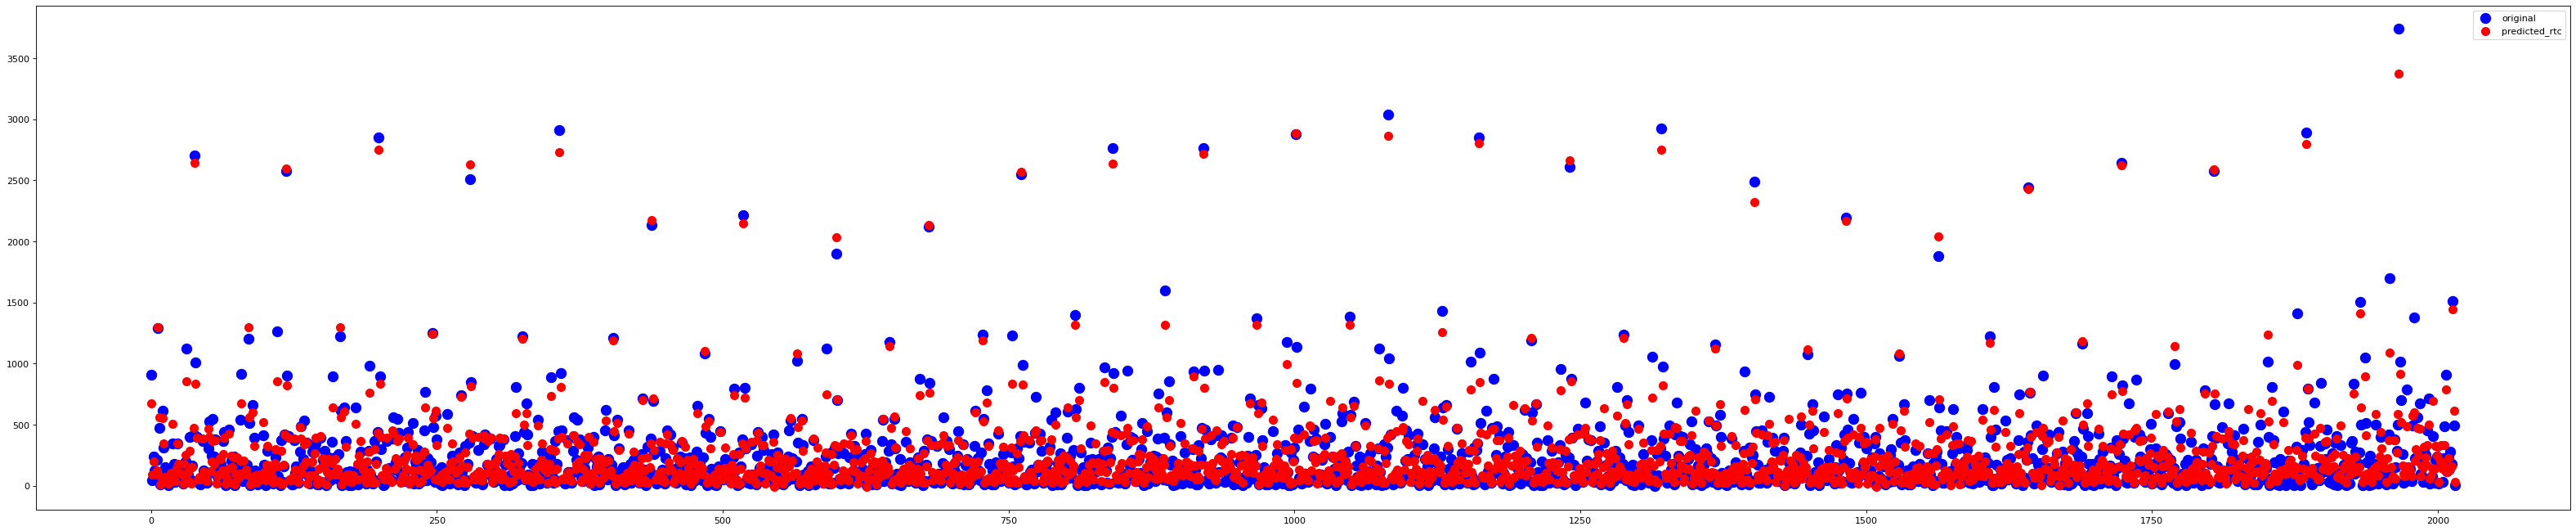

Visualization of Predictions for Test:


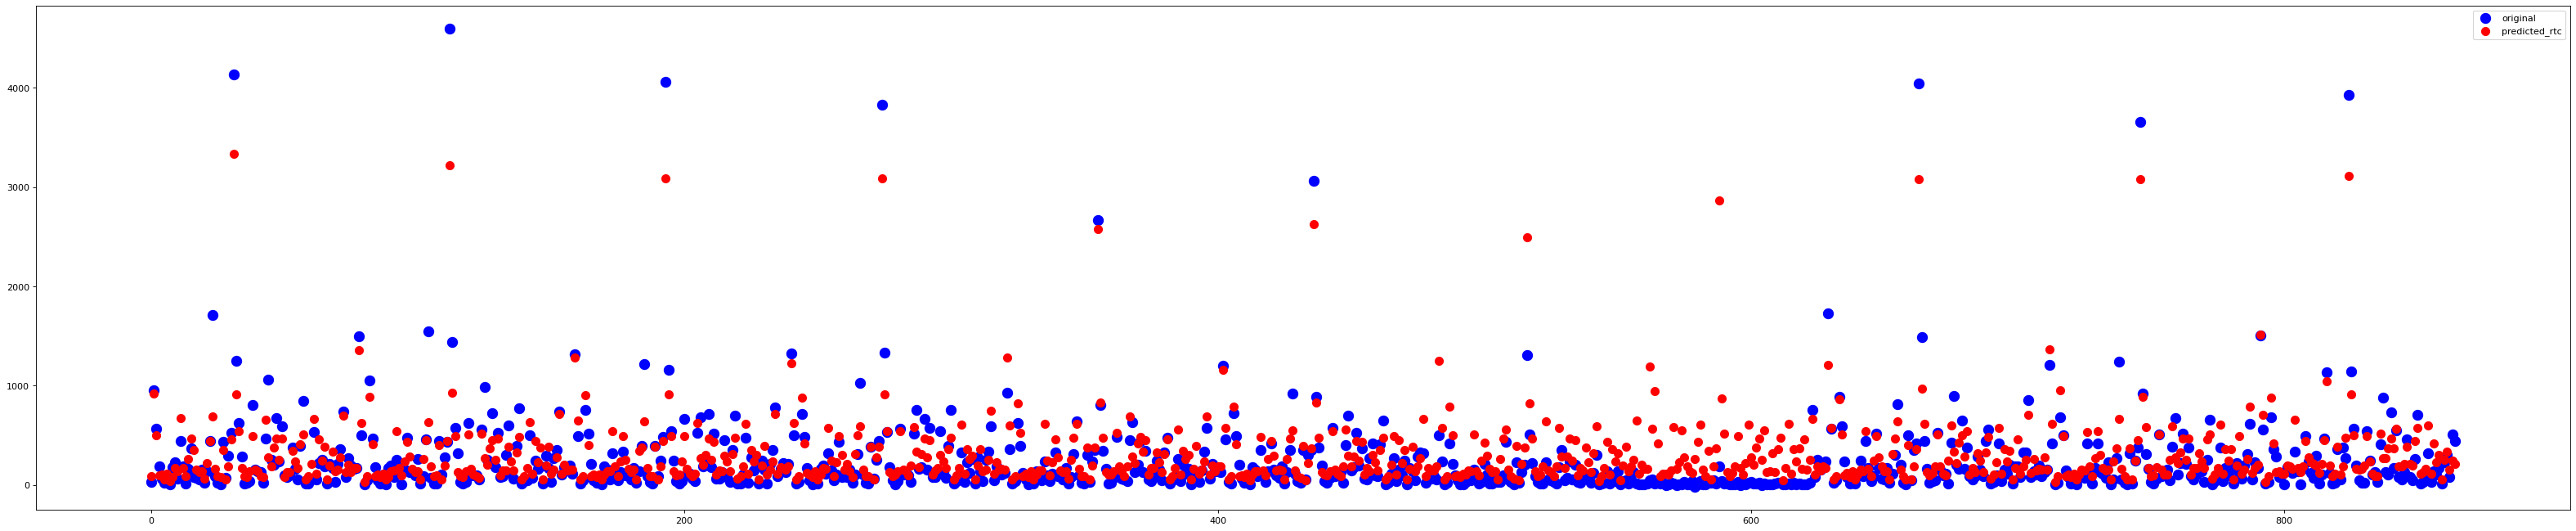

Visualization of Error for Train:


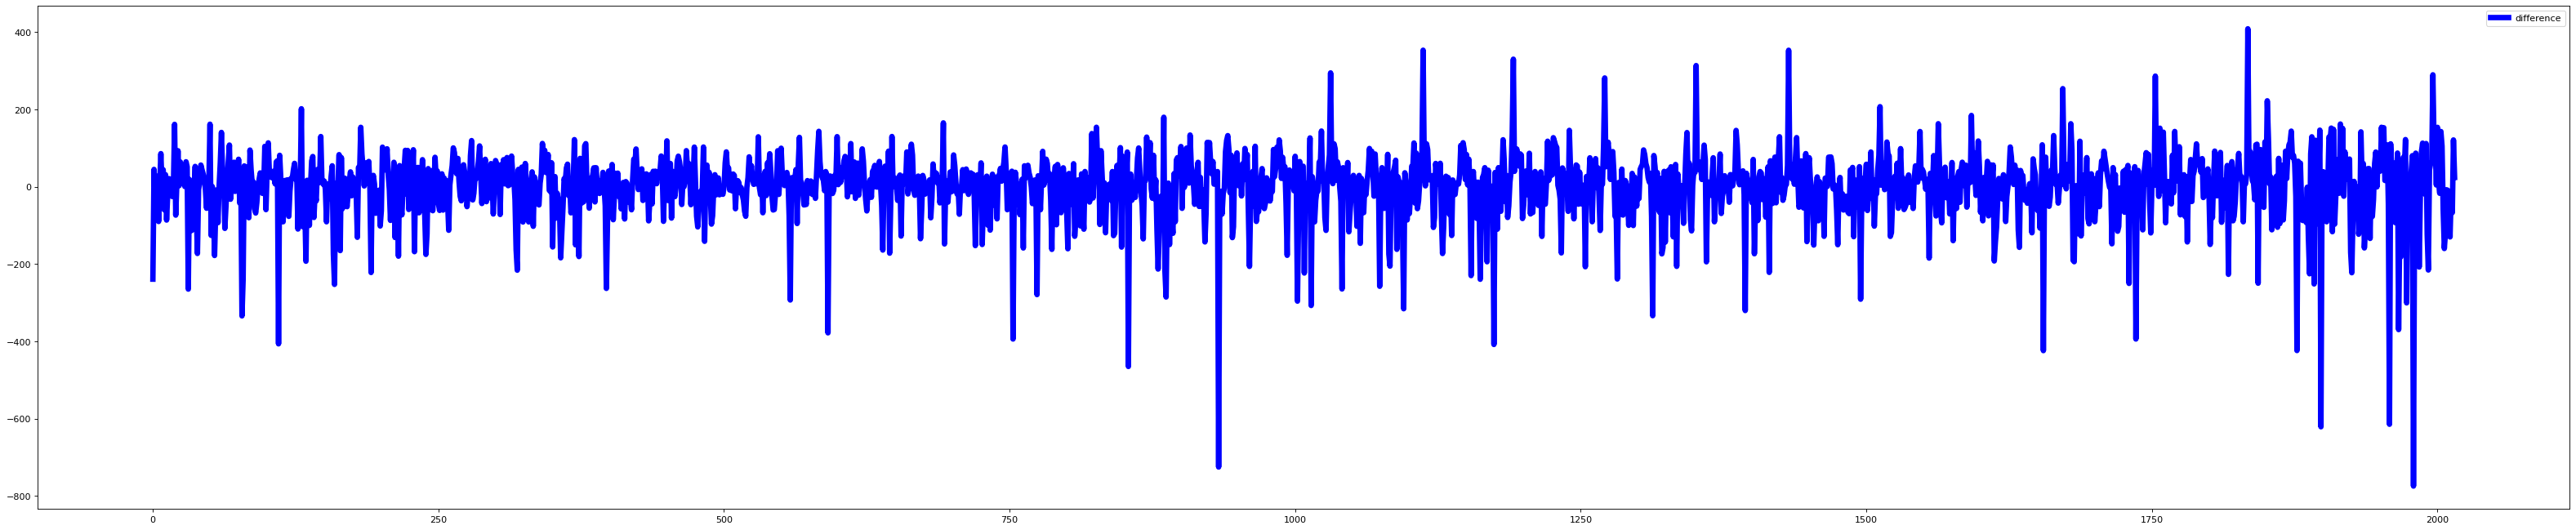

Visualization of Error for Test:


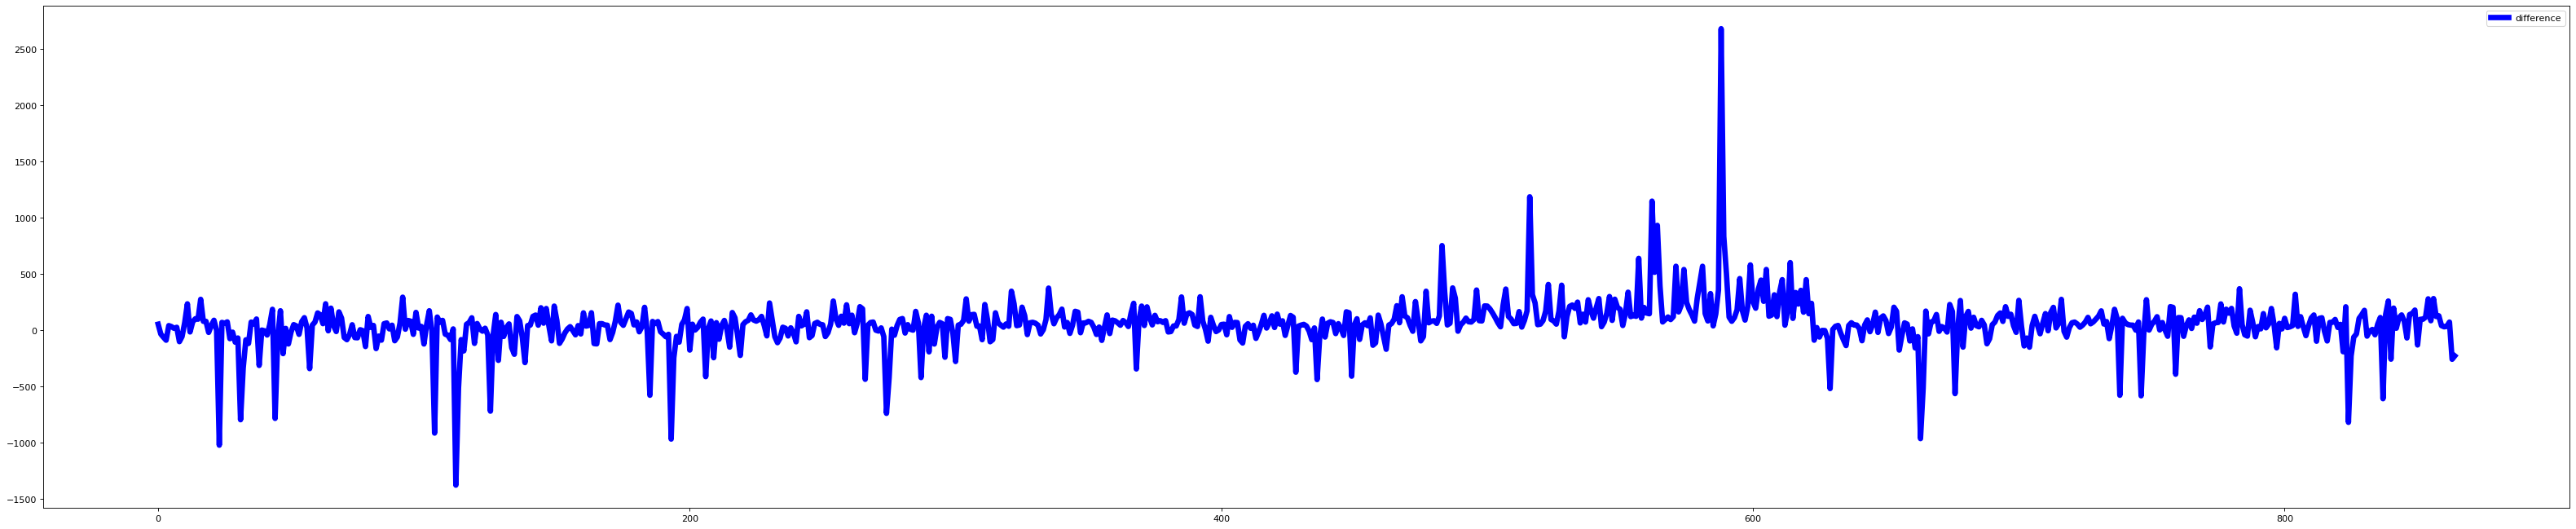

Jan 2020 predictions:  0    19028.25
dtype: float32
Feb 2020 predictions:  0    18973.248047
dtype: float32
March 2020 predictions:  0    18406.765625
dtype: float32
Apr 2020 predictions:  0    16181.587891
dtype: float32
Mean Absolute Error (Train):  57.107499445241594
Mean Absolute Error (Test):  131.59327892016813
Mean Squared Error (Train):  7375.679104152894
Mean Squared Error (Test):  48386.649679130904
Root Mean Squared Error (Train):  85.88177399281464
Root Mean Squared Error (Test):  219.96965626906567
R2 (Train):  0.9437242436747735
R2 (Test):  0.7648402694213241
Coefficient of Variance (Train):  0.36115790780380796
Coefficient of Variance (Test):  0.8750270301208182


In [ ]:
XGB_cv(X_train_5, y_train_5, X_test_5, y_test_5, X_5_2020)

In [ ]:
DecisionTreeRegressor?

In [ ]:
def decision_tree_cv(X_train, y_train, X_test, y_test, X_pred):

  dtr_reg = DecisionTreeRegressor()
  model_dtr = GridSearchCV(estimator=dtr_reg,
                           param_grid={"criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
                                        "min_samples_split": [ 2, 4, 6],
                                        "max_features":["auto", "sqrt", "log2"],},
                           scoring='neg_mean_squared_error',
                           cv=3, verbose=0, n_jobs=-1)

  model_dtr.fit(X_train, y_train)
  best = model_dtr.best_params_

  dtr_tuned = DecisionTreeRegressor(best)

  train_preds_dtr_reg  = dtr_tuned.predict(X_train)
  test_preds_dtr_reg = dtr_tuned.predict(X_test)

  mae_dtr_reg_train = mean_absolute_error(y_train, train_preds_dtr_reg)
  mae_dtr_reg_test = mean_absolute_error(y_test, test_preds_dtr_reg)

  mse_dtr_reg_train = mean_squared_error(y_train, train_preds_dtr_reg)
  mse_dtr_reg_test = mean_squared_error(y_test, test_preds_dtr_reg) 

  rmse_dtr_reg_train = mean_squared_error(y_train, train_preds_dtr_reg , squared=False)
  rmse_dtr_reg_test = mean_squared_error(y_test, test_preds_dtr_reg, squared=False)

  r2_dtr_reg_train = r2_score(y_train, train_preds_dtr_reg)
  r2_dtr_reg_test = r2_score(y_test, test_preds_dtr_reg)

  explained_variance_dtr_train = explained_variance_score(y_train, train_preds_dtr_reg)
  explained_variance_dtr_test = explained_variance_score(y_test, test_preds_dtr_reg)

  CoV_train_dtr = rmse_dtr_reg_train/np.mean(y_train)
  CoV_test_dtr = rmse_dtr_reg_test/np.mean(y_test)

  predictions2020_dtr_reg = dtr_reg.predict(X_pred)
  df_dtr = pd.DataFrame(predictions2020_dtr_reg, columns=['2020_Predictions'])  
  df_dtr_2020_01 = df_dtr.iloc[0:81,:].values
  df_dtr_2020_02 = df_dtr.iloc[81:163,:].values
  df_dtr_2020_03 = df_dtr.iloc[162:244,:].values
  df_dtr_2020_04 = df_dtr.iloc[244:325,:].values
  df_dtr_2020_01 = (pd.DataFrame(df_dtr_2020_01)).sum() 
  df_dtr_2020_02 = (pd.DataFrame(df_dtr_2020_02)).sum() 
  df_dtr_2020_03 = (pd.DataFrame(df_dtr_2020_03)).sum() 
  df_dtr_2020_04 = (pd.DataFrame(df_dtr_2020_04)).sum()

In [ ]:
decision_tree_cv(X_train_5, y_train_5, X_test_5, y_test_5, X_5_2020)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


18 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 179, in fit
    "Some value(s) of y are negative which is"
ValueError: Some value(s) of y are negative which is no

TypeError: ignored

It is clearly can be seean that most of error caused by outliers. In next chapter the effect of outliers will be examined.

***ELIMINATING OUTLIERS***

Since it is thought that the outliers of the dataset may have a negative effect on the results, the case of removing these values from the dataset was evaluated.

In [ ]:
# Eliminating outliers:
Q1 = ProductX['Quantity'].quantile(0.25)
Q3 = ProductX['Quantity'].quantile(0.75)
IQR = Q3-Q1
lower_bound = 0
upper_bound = Q3 + 1.5*IQR
inconsistent_values = (ProductX['Quantity'] < lower_bound) | (ProductX['Quantity'] > upper_bound)
index = ProductX[inconsistent_values].index
ProductX_wo_outliers = ProductX.drop(index)
ProductX_wo_outliers

# In this part the dataset restricted between 0 and upper bound of Quantity value.

,Period,Province,Month,Year,Season,BigCity,Region,StockMarket,DolarB,DolarS,CPI(Year),CPI(Month),Male,Male_Province,Male_Rural,Trends_Eczacıbaşı,Trends_Prostat,Med_Deg,Quantity
1,2017-01-01,1,1,2017,3,0,6,2.379,3.7468,3.7536,9.22,2.46,307819.0,203955.0,103865.0,0,0,3.8,44.0
2,2017-01-01,2,1,2017,3,0,0,2.379,3.7468,3.7536,9.22,2.46,354456.0,207099.0,147357.0,0,24,-2.4,236.0
3,2017-01-01,10,1,2017,3,0,3,2.379,3.7468,3.7536,9.22,2.46,281105.0,158643.0,122462.0,0,0,-13.4,126.0
4,2017-01-01,3,1,2017,3,0,2,2.379,3.7468,3.7536,9.22,2.46,197601.0,130684.0,66917.0,0,0,-1.7,70.0
5,2017-01-01,4,1,2017,3,0,1,2.379,3.7468,3.7536,9.22,2.46,161792.0,115224.0,46568.0,0,48,2.2,214.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3200,2020-04-01,69,4,2020,1,0,0,4.780,5.9303,5.9303,1.35,12.15,100673.0,100295.0,136286.0,0,0,12.1,NaN
3201,2020-04-01,70,4,2020,1,1,3,4.780,5.9303,5.9303,1.35,12.15,92837.0,93453.0,123674.0,17,31,8.6,NaN
3202,2020-04-01,71,4,2020,1,0,4,4.780,5.9303,5.9303,1.35,12.15,53991.0,54228.0,72283.0,0,0,11.6,NaN
3203,2020-04-01,72,4,2020,1,0,2,4.780,5.9303,5.9303,1.35,12.15,209819.0,210125.0,271936.0,0,53,7.4,NaN


In [ ]:
ProductX_wo_outliers = ProductX_wo_outliers.reset_index(drop=True)
ProductX_wo_outliers

,Period,Province,Month,Year,Season,BigCity,Region,StockMarket,DolarB,DolarS,CPI(Year),CPI(Month),Male,Male_Province,Male_Rural,Trends_Eczacıbaşı,Trends_Prostat,Med_Deg,Quantity
0,2017-01-01,1,1,2017,3,0,6,2.379,3.7468,3.7536,9.22,2.46,307819.0,203955.0,103865.0,0,0,3.8,44.0
1,2017-01-01,2,1,2017,3,0,0,2.379,3.7468,3.7536,9.22,2.46,354456.0,207099.0,147357.0,0,24,-2.4,236.0
2,2017-01-01,10,1,2017,3,0,3,2.379,3.7468,3.7536,9.22,2.46,281105.0,158643.0,122462.0,0,0,-13.4,126.0
3,2017-01-01,3,1,2017,3,0,2,2.379,3.7468,3.7536,9.22,2.46,197601.0,130684.0,66917.0,0,0,-1.7,70.0
4,2017-01-01,4,1,2017,3,0,1,2.379,3.7468,3.7536,9.22,2.46,161792.0,115224.0,46568.0,0,48,2.2,214.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,2020-04-01,69,4,2020,1,0,0,4.780,5.9303,5.9303,1.35,12.15,100673.0,100295.0,136286.0,0,0,12.1,NaN
2983,2020-04-01,70,4,2020,1,1,3,4.780,5.9303,5.9303,1.35,12.15,92837.0,93453.0,123674.0,17,31,8.6,NaN
2984,2020-04-01,71,4,2020,1,0,4,4.780,5.9303,5.9303,1.35,12.15,53991.0,54228.0,72283.0,0,0,11.6,NaN
2985,2020-04-01,72,4,2020,1,0,2,4.780,5.9303,5.9303,1.35,12.15,209819.0,210125.0,271936.0,0,53,7.4,NaN


In [ ]:
##################--- DataFrames for Train ---##################


# Dataset which excluded the Period, DolarB, Male_Rural variables:
X_1 = ProductX_wo_outliers.iloc[:2663, [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12 ,13, 15, 16, 18]].values
y_1 = ProductX_wo_outliers.iloc[:2663, 17].values

# Dataset which excluded the Period, Province, DolarB, Male_Rural variables:
X_2 = ProductX_wo_outliers.iloc[:2663, [2, 3, 4, 5, 6, 7, 9, 10, 11 ,13, 15, 16, 18]].values
y_2 = ProductX_wo_outliers.iloc[:2663, 17].values

# Dataset which excluded the Period, Province, DolarB, Borsa, Male, Male_Rural variables:
X_3 = ProductX_wo_outliers.iloc[:2663, [2, 3, 4, 5, 6, 9, 10, 11 ,13, 15, 16, 18]].values
y_3 = ProductX_wo_outliers.iloc[:2663, 17].values

##################--- DataFrames for Test ---##################

# Dataset which excluded the Period, DolarB, Male_Rural variables:
X_1_2020 = ProductX_wo_outliers.iloc[2663:, [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12 ,13, 15, 16, 18]].values
y_1_2020 = ProductX_wo_outliers.iloc[2663:, 17].values

# Dataset which excluded the Period, Province, DolarB, Male_Rural variables:
X_2_2020 = ProductX_wo_outliers.iloc[:2663, [2, 3, 4, 5, 6, 7, 9, 10, 11 ,13, 15, 16, 18]].values
y_2_2020 = ProductX_wo_outliers.iloc[2663:, 17].values

# Dataset which excluded the Period, Province, DolarB, Borsa, Male, Male_Rural variables:
X_3_2020 = ProductX_wo_outliers.iloc[2663:, [2, 3, 4, 5, 6, 9, 10, 11 ,13, 15, 16, 18]].values
y_3_2020 = ProductX_wo_outliers.iloc[2663:, 17].values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_1 = scaler.fit_transform(X_1)
X_2 = scaler.fit_transform(X_2)
X_3 = scaler.fit_transform(X_3)

X_1_2020 = scaler.fit_transform(X_1_2020)
X_2_2020 = scaler.fit_transform(X_2_2020)
X_3_2020 = scaler.fit_transform(X_3_2020)

# Splitting dataset:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, shuffle=False, random_state = 0)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, shuffle=False, random_state = 0)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.3, shuffle=False, random_state = 0)

MAE Train:  15.617844530313311
MAE Test:  74.5184813766217
MSE Train:  487.98923064868967
MSE Test:  11471.993476406748
RMSE Train:  22.090478280215883
RMSE Test:  107.10739225845595
R2 Train:  0.9782291066573011
R2 Test:  0.5445799124312825
Mape Train:  27.145724511343982
Mape Test:  263.823373115349
Explanied Variance Score Train:  0.9782303937523349
Explanied Variance Score Test:  0.5452171491045643
CoV Test:  0.6727258938976378
2020_01:  0    12546.0
dtype: float32
2020_02:  0    12724.0
dtype: float32
2020_03:  0    12082.0
dtype: float32
2020_04:  0    11303.0
dtype: float32


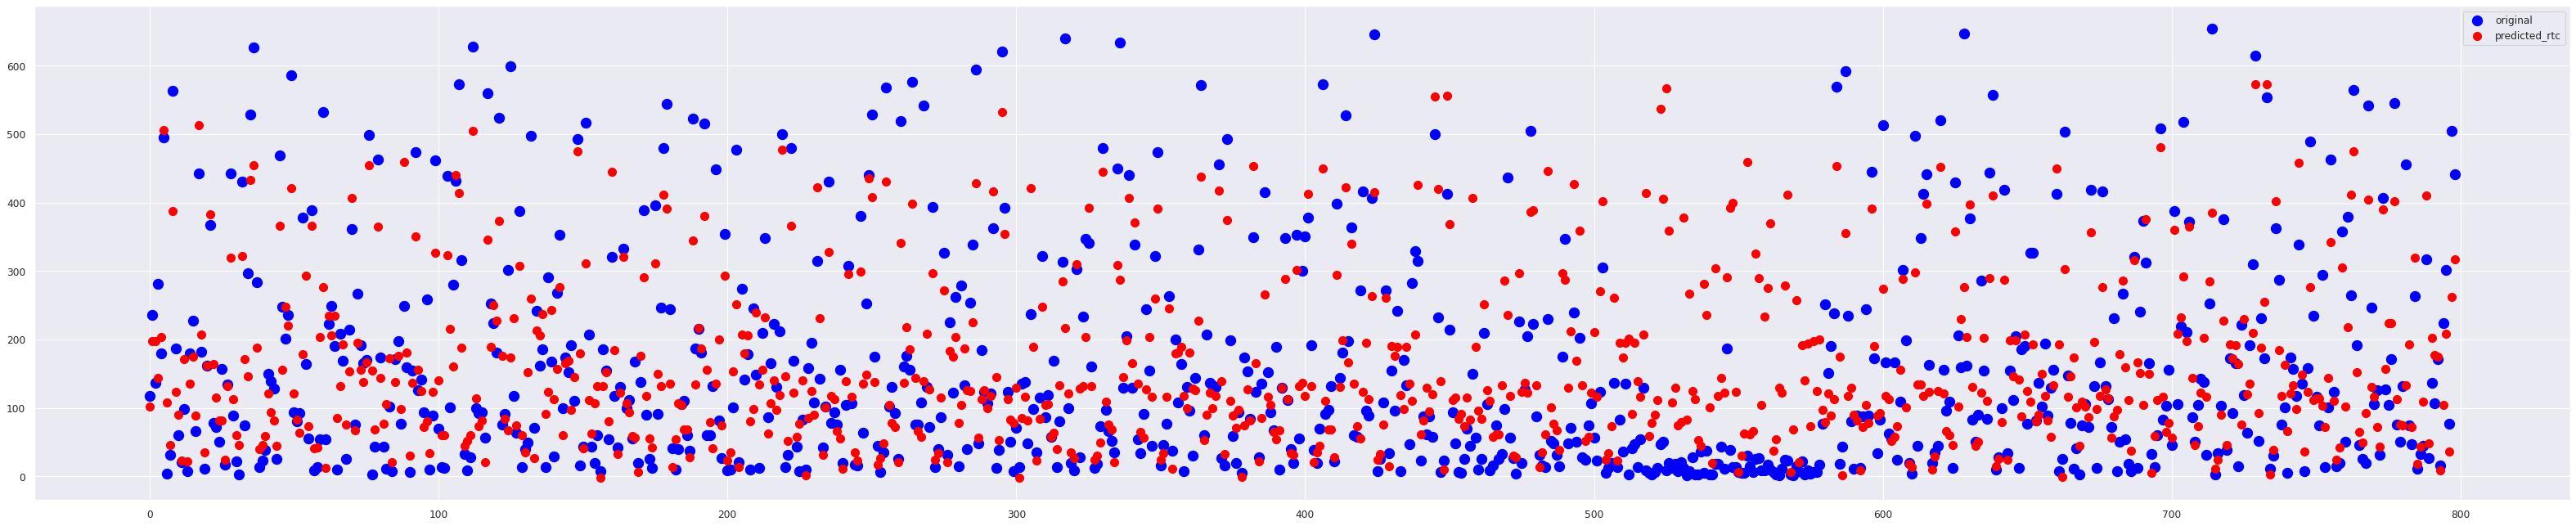

MAE Train:  21.230650351410773
MAE Test:  71.22065706351522
MSE Train:  935.9904643030486
MSE Test:  11650.784697206018
RMSE Train:  30.593961239157125
RMSE Test:  107.93880070301883
R2 Train:  0.9582422166549925
R2 Test:  0.5374821823288045
Mape Train:  44.54103422328431
Mape Test:  245.25259019465602
Explanied Variance Score Train:  0.9582435341207509
Explanied Variance Score Test:  0.540183986994222
CoV Test:  0.6779478489585262
2020_01:  0    13360.0
dtype: float32
2020_02:  0    13506.0
dtype: float32
2020_03:  0    13915.0
dtype: float32
2020_04:  0    12456.0
dtype: float32


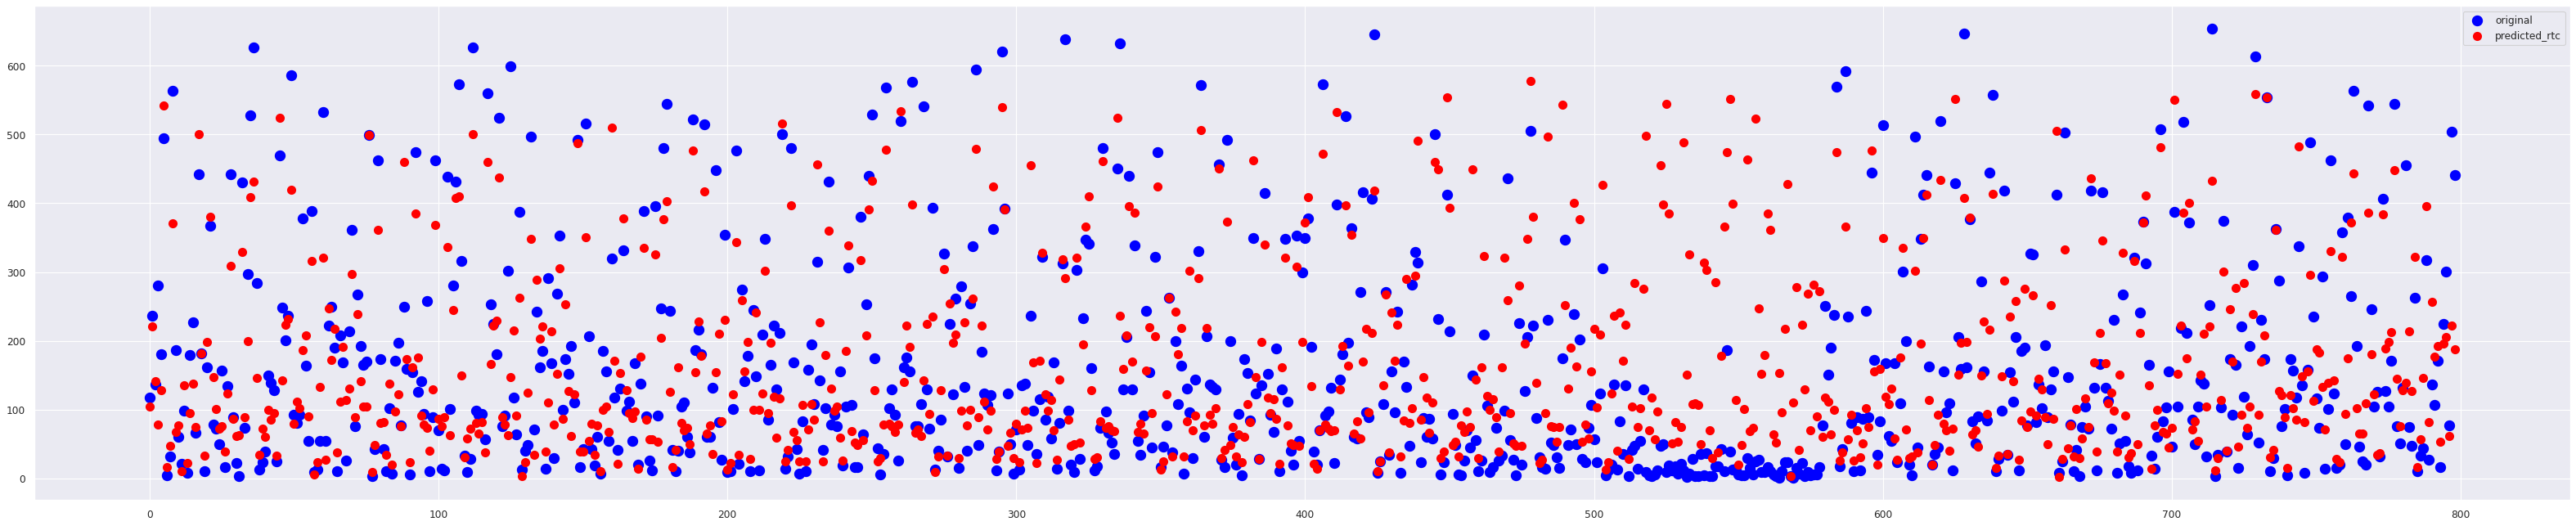

MAE Train:  21.85656090368529
MAE Test:  71.31710844463639
MSE Train:  992.5962264310438
MSE Test:  11483.66577800937
RMSE Train:  31.505495178318398
RMSE Test:  107.16186718235815
R2 Train:  0.9557168371333327
R2 Test:  0.5441165404263273
Mape Train:  44.704949733922334
Mape Test:  249.95153451876746
Explanied Variance Score Train:  0.9557183881151654
Explanied Variance Score Test:  0.5472385223792995
CoV Test:  0.6730680429417364
2020_01:  0    12842.0
dtype: float32
2020_02:  0    12771.0
dtype: float32
2020_03:  0    12568.0
dtype: float32
2020_04:  0    12092.0
dtype: float32


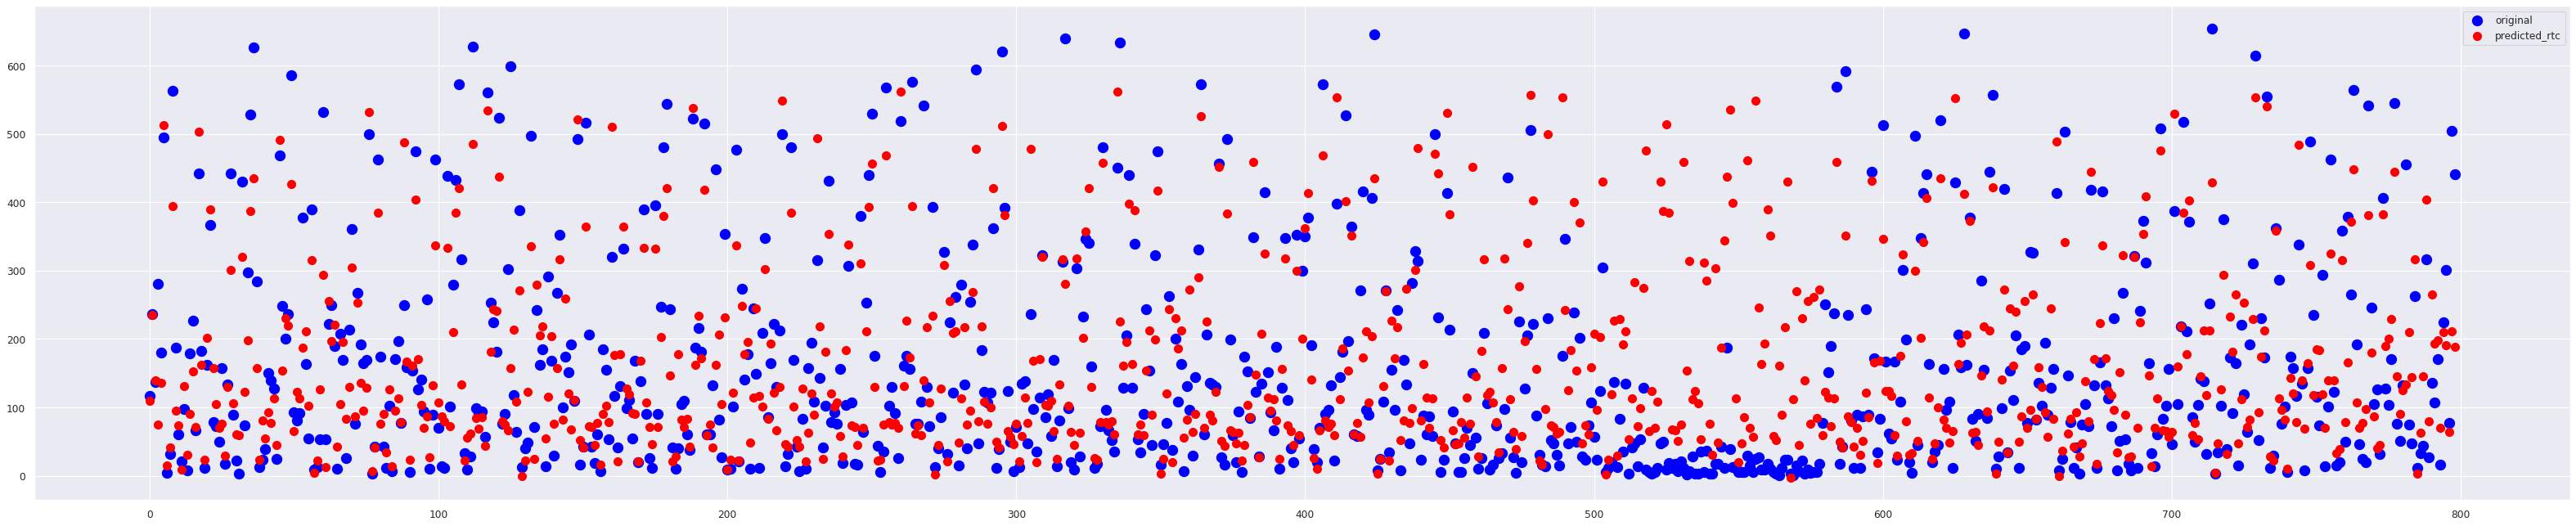

In [ ]:
XGB(X_train_1, y_train_1, X_test_1, y_test_1, X_1_2020)
XGB(X_train_2, y_train_2, X_test_2, y_test_2, X_2_2020)
XGB(X_train_3, y_train_3, X_test_3, y_test_3, X_3_2020)

The analyzes showed that the removal of outliers from the dataset both positively and negatively affected the results. Although the error metrics have decreased as desired, the significant decrease in the 2020 forecasts creates the feeling that the forecasts are wrong. For this reason, the predictions for 2020 were calculated without removing the outliers.

***MOVING AVERAGES***

Since the results obtained in the previous analyzes were not satisfactory, it was necessary to consider of adding new parameters to the dataset. In this section, three additional columns have been added to the main data set in order to better model the upward trend in sales data: Sales data of the previous month, sales data of three months ago, average sales quantity of the last three months.

Since the XGBOOST algorithm performs well in general and can work with missing data, it has been chosen in this section.

In [ ]:
ProductX_2 = ProductX.copy()

ProductX_2 = pd.read_csv('gdrive/My Drive/VitrA/Product_X_ALL_18092021.csv', sep=";")
df_heat = pd.read_excel('gdrive/My Drive/VitrA/20210914C0A8-Aylık Ortalama Sıcaklık (°C).xlsx')

ProductX_2['Quantity'] = ProductX_2['Quantity'].fillna(0)

In [ ]:
ProductX_2 = ProductX_2[df.Quantity != 0]
ProductX_2 = ProductX_2.reset_index(drop=True)

In [ ]:
df_last_2 = pd.merge(ProductX_2, df_heat)
df_last_2.reset_index(inplace=False)
df_last_2

,Period,Province,Month,Year,Season,BigCity,Region,Borsa,DolarB,DolarS,CPI(Year),CPI(Month),Male,Male_Province,Male_Rural,Trends_Eczacıbaşı,Trends_Prostat,Quantity,Last_Month,3_monBef,Ave_3_Mot,Med_Deg
0,201701,Adana,1,2017,winter,1,ME,"2,379","3,7468","3,7536","9,22","2,46",1101973,1101973,0,6,28,910.0,0.0,NaN,NaN,8.7
1,201701,Adıyaman,1,2017,winter,0,SE,"2,379","3,7468","3,7536","9,22","2,46",307819,203955,103865,0,0,44.0,0.0,NaN,NaN,3.8
2,201701,Afyon,1,2017,winter,0,AE,"2,379","3,7468","3,7536","9,22","2,46",354456,207099,147357,0,24,236.0,NaN,NaN,NaN,-2.4
3,201701,Ağrı,1,2017,winter,0,EA,"2,379","3,7468","3,7536","9,22","2,46",281105,158643,122462,0,0,126.0,NaN,NaN,NaN,-13.4
4,201701,Aksaray,1,2017,winter,0,CE,"2,379","3,7468","3,7536","9,22","2,46",197601,130684,66917,0,0,70.0,NaN,NaN,NaN,-1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3200,202004,Uşak,4,2020,spring,0,AE,"4,78","5,9303","5,9303","1,35","12,15",100673,100295,136286,0,0,0.0,NaN,NaN,NaN,12.1
3201,202004,Van,4,2020,spring,1,EA,"4,78","5,9303","5,9303","1,35","12,15",92837,93453,123674,17,31,0.0,NaN,NaN,NaN,8.6
3202,202004,Yalova,4,2020,spring,0,MA,"4,78","5,9303","5,9303","1,35","12,15",53991,54228,72283,0,0,0.0,NaN,NaN,NaN,11.6
3203,202004,Yozgat,4,2020,spring,0,CE,"4,78","5,9303","5,9303","1,35","12,15",209819,210125,271936,0,53,0.0,NaN,NaN,NaN,7.4


In [ ]:
ProductX_copy = df_last_2.copy()

In [ ]:
ProductX_copy['CPI(Year)']=ProductX_copy['CPI(Year)'].str.replace(',','.')
ProductX_copy['CPI(Month)']=ProductX_copy['CPI(Month)'].str.replace(',','.')
ProductX_copy['Borsa']=ProductX_copy['Borsa'].str.replace(',','.')
ProductX_copy['DolarB']=ProductX_copy['DolarB'].str.replace(',','.')
ProductX_copy['DolarS']=ProductX_copy['DolarS'].str.replace(',','.')

ProductX_copy['CPI(Year)']=ProductX_copy['CPI(Year)'].astype(float)
ProductX_copy['CPI(Month)']=ProductX_copy['CPI(Month)'].astype(float)
ProductX_copy['Period'] = ProductX_copy['Period'].astype(int)
ProductX_copy['Year'] = ProductX_copy['Year'].astype(int)
ProductX_copy['Month'] = ProductX_copy['Month'].astype(int)
ProductX_copy['Borsa'] = ProductX_copy['Borsa'].astype(float)
ProductX_copy['DolarB'] = ProductX_copy['DolarB'].astype(float)
ProductX_copy['DolarS'] = ProductX_copy['DolarS'].astype(float)
ProductX_copy['Male'] = ProductX_copy['Male'].astype(float)
ProductX_copy['Male_Province'] = ProductX_copy['Male_Province'].astype(float)
ProductX_copy['Male_Rural'] = ProductX_copy['Male_Rural'].astype(float)

In [ ]:
ProductX_copy['Province'] = labelencoder.fit_transform(ProductX_copy['Province'].values)
ProductX_copy['Season'] = labelencoder.fit_transform(ProductX_copy['Season'].values)
ProductX_copy['Region'] = labelencoder.fit_transform(ProductX_copy['Region'].values)

In [ ]:
ProductX_2.head(245)

,Period,Province,Month,Year,Season,BigCity,Region,Borsa,DolarB,DolarS,CPI(Year),CPI(Month),Male,Male_Province,Male_Rural,Trends_Eczacıbaşı,Trends_Prostat,Quantity,Last_Month,3_monBef,Ave_3_Mot
0,201701,Adana,1,2017,winter,1,ME,"2,379","3,7468","3,7536","9,22","2,46",1101973,1101973,0,6,28,910.0,0.0,NaN,NaN
1,201701,Adıyaman,1,2017,winter,0,SE,"2,379","3,7468","3,7536","9,22","2,46",307819,203955,103865,0,0,44.0,0.0,NaN,NaN
2,201701,Afyon,1,2017,winter,0,AE,"2,379","3,7468","3,7536","9,22","2,46",354456,207099,147357,0,24,236.0,NaN,NaN,NaN
3,201701,Ağrı,1,2017,winter,0,EA,"2,379","3,7468","3,7536","9,22","2,46",281105,158643,122462,0,0,126.0,NaN,NaN,NaN
4,201701,Aksaray,1,2017,winter,0,CE,"2,379","3,7468","3,7536","9,22","2,46",197601,130684,66917,0,0,70.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,201704,Adana,4,2017,spring,1,ME,"3,104","3,6495","3,6561","11,87","1,31",1103873,1103873,0,8,29,764.0,895.0,910.0,907.0
241,201704,Adıyaman,4,2017,spring,0,SE,"3,104","3,6495","3,6561","11,87","1,31",308292,205019,103272,0,0,42.0,80.0,44.0,53.0
242,201704,Afyon,4,2017,spring,0,BS,"3,104","3,6495","3,6561","11,87","1,31",354451,207499,146952,20,0,228.0,231.0,236.0,218.0
243,201704,Ağrı,4,2017,spring,0,EA,"3,104","3,6495","3,6561","11,87","1,31",280252,158386,121867,0,85,126.0,113.0,126.0,121.0


In [ ]:
ProductX_copy.tail(325)

,Period,Province,Month,Year,Season,BigCity,Region,Borsa,DolarB,DolarS,CPI(Year),CPI(Month),Male,Male_Province,Male_Rural,Trends_Eczacıbaşı,Trends_Prostat,Quantity,Last_Month,3_monBef,Ave_3_Mot,Med_Deg
2880,201912,73,12,2019,3,0,1,3.651,5.8467,5.8572,11.84,0.74,294494.0,294494.0,294494.0,0,0,441.0,310.0,17.0,218.0,10.3
2881,202001,0,1,2020,3,1,5,4.113,5.9303,5.9303,1.35,12.15,1117906.0,1117906.0,0.0,4,33,0.0,614.0,754.0,742.0,9.9
2882,202001,1,1,2020,3,0,6,4.113,5.9303,5.9303,1.35,12.15,217079.0,217215.0,315977.0,0,15,0.0,52.0,77.0,70.0,5.7
2883,202001,2,1,2020,3,0,0,4.113,5.9303,5.9303,1.35,12.15,216097.0,216150.0,362394.0,40,30,0.0,231.0,251.0,206.0,-0.6
2884,202001,10,1,2020,3,0,3,4.113,5.9303,5.9303,1.35,12.15,157066.0,157280.0,277674.0,0,0,0.0,194.0,151.0,149.0,-11.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3200,202004,69,4,2020,1,0,0,4.780,5.9303,5.9303,1.35,12.15,100673.0,100295.0,136286.0,0,0,0.0,NaN,NaN,NaN,12.1
3201,202004,70,4,2020,1,1,3,4.780,5.9303,5.9303,1.35,12.15,92837.0,93453.0,123674.0,17,31,0.0,NaN,NaN,NaN,8.6
3202,202004,71,4,2020,1,0,4,4.780,5.9303,5.9303,1.35,12.15,53991.0,54228.0,72283.0,0,0,0.0,NaN,NaN,NaN,11.6
3203,202004,72,4,2020,1,0,2,4.780,5.9303,5.9303,1.35,12.15,209819.0,210125.0,271936.0,0,53,0.0,NaN,NaN,NaN,7.4


In [ ]:
##################--- DataFrames for Train ---##################


# Dataset which excluded the Period, DolarB, Male_Rural variables:
X_1 = ProductX_copy.iloc[240:2881, [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12 ,13, 15, 16, 18, 19, 20, 21]].values
y_1 = ProductX_copy.iloc[240:2881, 17].values

# Dataset which excluded the Period, Province, DolarB, Male_Rural variables:
X_2 = ProductX_copy.iloc[240:2881, [2, 3, 4, 5, 6, 7, 9, 10, 11 ,13, 15, 16, 18, 19, 20, 21]].values
y_2 = ProductX_copy.iloc[240:2881, 17].values

# Dataset which excluded the Period, Province, DolarB, Borsa, Male, Male_Rural variables:
X_3 = ProductX_copy.iloc[240:2881, [2, 3, 4, 5, 6, 9, 10, 11 ,13, 15, 16, 18, 19, 20, 21]].values
y_3 = ProductX_copy.iloc[240:2881, 17].values

##################--- DataFrames for Test ---##################

# Dataset which excluded the Period, DolarB, Male_Rural variables:
X_1_2020 = ProductX_copy.iloc[2881:, [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12 ,13, 15, 16, 18, 19, 20, 21]].values
y_1_2020 = ProductX_copy.iloc[2881:, 17].values

# Dataset which excluded the Period, Province, DolarB, Male_Rural variables:
X_2_2020 = ProductX_copy.iloc[:2881, [2, 3, 4, 5, 6, 7, 9, 10, 11 ,13, 15, 16, 18, 19, 20, 21]].values
y_2_2020 = ProductX_copy.iloc[2881:, 17].values

# Dataset which excluded the Period, Province, DolarB, Borsa, Male, Male_Rural variables:
X_3_2020 = ProductX_copy.iloc[2881:, [2, 3, 4, 5, 6, 9, 10, 11 ,13, 15, 16, 18, 19, 20, 21]].values
y_3_2020 = ProductX_copy.iloc[2881:, 17].values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_1 = scaler.fit_transform(X_1)
X_2 = scaler.fit_transform(X_2)
X_3 = scaler.fit_transform(X_3)

X_1_2020 = scaler.fit_transform(X_1_2020)
X_2_2020 = scaler.fit_transform(X_2_2020)
X_3_2020 = scaler.fit_transform(X_3_2020)

# Splitting dataset:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, shuffle=False, random_state = 0)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, shuffle=False, random_state = 0)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.3, shuffle=False, random_state = 0)

In [ ]:
XGB(X_train_1, y_train_1, X_test_1, y_test_1, X_1_2020)
XGB(X_train_2, y_train_2, X_test_2, y_test_2, X_2_2020)
XGB(X_train_3, y_train_3, X_test_3, y_test_3, X_3_2020)

MAE Train:  22.453458148163634
MAE Test:  103.52282076014245
MSE Train:  1095.0890688172792
MSE Test:  45564.83770138527
RMSE Train:  33.09213001330194
RMSE Test:  213.45921788806703
R2 Train:  0.9920042453981872
R2 Test:  0.7678423742229383
Mape Train:  28.891036659713354
Mape Test:  226.87934821894697
Explanied Variance Score Train:  0.9920858362174696
Explanied Variance Score Test:  0.7723243650750626
CoV Test:  0.8712710828288484
2020_01:  0    19024.0
dtype: float32
2020_02:  0    13162.0
dtype: float32
2020_03:  0    12899.0
dtype: float32
2020_04:  0    1500.0
dtype: float32
MAE Train:  22.54667205469949
MAE Test:  103.83876518764231
MSE Train:  1101.5851959812765
MSE Test:  46373.10245282933
RMSE Train:  33.190137028660736
RMSE Test:  215.3441488706608
R2 Train:  0.9919568141525064
R2 Test:  0.763724180563953
Mape Train:  28.75123266785142
Mape Test:  222.87671348832453
Explanied Variance Score Train:  0.992039338711741
Explanied Variance Score Test:  0.7681502861724404
CoV Tes

Since the estimates obtained from these analyzes are quite low compared to previous years, it can been seen that the added columns have a negative effect on the model. Therefore, all estimations were made using the main data set made in the first section.

***TIME SERIES***

Since sales data changes depending on time, it is thought that the time series method can be used besides machine learning models.

In [ ]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 8.1 MB/s 
     |████████████████████████████████| 9.5 MB 21.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
#ARIMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import pmdarima as pm
from pmdarima.model_selection import train_test_split

from fbprophet import Prophet

from pandas import to_datetime

import itertools
import warnings

import datetime
from datetime import datetime
warnings.filterwarnings('ignore')

In [ ]:
df_ts = pd.read_csv('gdrive/My Drive/VitrA/TimeSeriesX.csv', sep=";")
df_ts

,Date,Quantity
0,2017-01-01,19375
1,2017-02-01,18863
2,2017-03-01,19959
3,2017-04-01,17891
4,2017-05-01,19651
5,2017-06-01,15839
6,2017-07-01,16534
7,2017-08-01,15378
8,2017-09-01,16552
9,2017-10-01,19671


In [ ]:
df_ts['Date'] = pd.to_datetime(df_ts['Date'])
df_ts

,Date,Quantity
0,2017-01-01,19375
1,2017-02-01,18863
2,2017-03-01,19959
3,2017-04-01,17891
4,2017-05-01,19651
5,2017-06-01,15839
6,2017-07-01,16534
7,2017-08-01,15378
8,2017-09-01,16552
9,2017-10-01,19671


In [ ]:
df_ts.dtypes

Date        datetime64[ns]
Quantity             int64
dtype: object

In [ ]:
# Settin "Date" as index of DataFrame:

df_ts.set_index('Date',inplace=True)
df_ts

,Quantity
Date,
2017-01-01,19375
2017-02-01,18863
2017-03-01,19959
2017-04-01,17891
2017-05-01,19651
2017-06-01,15839
2017-07-01,16534
2017-08-01,15378
2017-09-01,16552


In [ ]:
# Check point:

df_ts.to_csv('gdrive/My Drive/VitrA/ProductX_TS.csv')

Exploring data and it's trends:

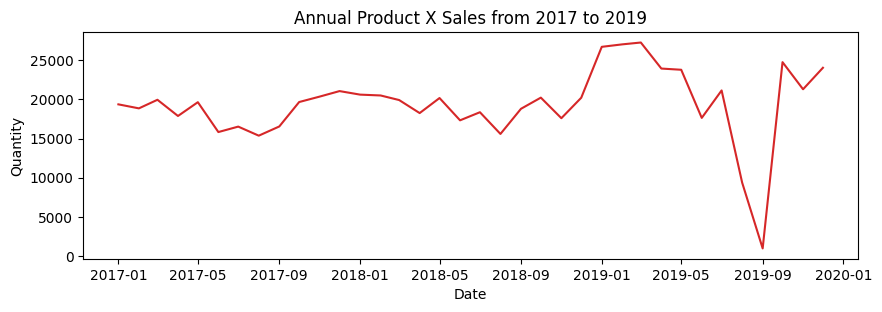

In [ ]:
# Time series data source: fpp pacakge in R.
import matplotlib.pyplot as plt

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Quantity', dpi=100):
    plt.figure(figsize=(10,3), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df_ts, x=df_ts.index, y=df_ts.Quantity, title='Annual Product X Sales from 2017 to 2019')    

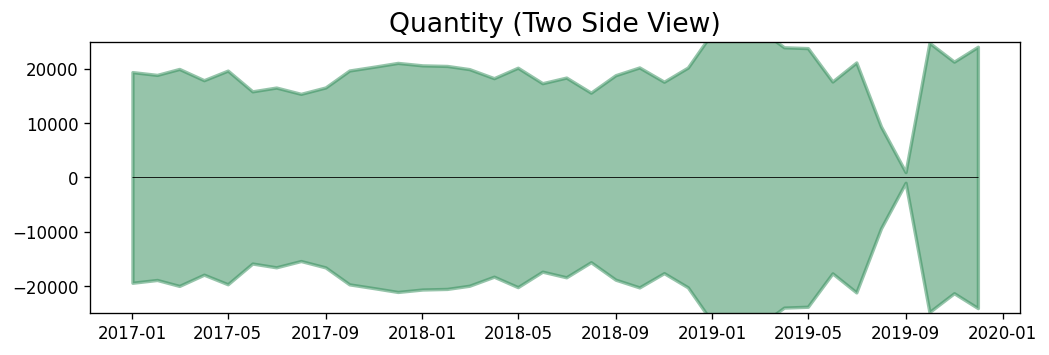

In [ ]:
# Import data

df_a = pd.read_csv('gdrive/My Drive/VitrA/ProductX_TS.csv', parse_dates=['Date'])

x = df_a['Date'].values
y1 = df_a['Quantity'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10,3), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-25000, 25000)
plt.title('Quantity (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df_a.Date), xmax=np.max(df_a.Date), linewidth=.5)
plt.show()

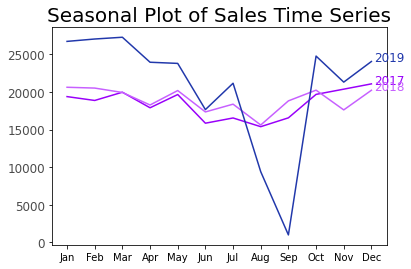

<Figure size 1440x720 with 0 Axes>

In [ ]:
# Prepare data
df_a['year'] = [d.year for d in df_a.Date]
df_a['month'] = [d.strftime('%b') for d in df_a.Date]
years = df_a['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot

for i, y in enumerate(years):
    if i >= 0:        
        plt.plot('month', 'Quantity', data=df_a.loc[df_a['year']==y, :], color=mycolors[i], label=y)
        plt.text(df_a.loc[df_a.year==y, :].shape[0]-.9, df_a.loc[df_a.year==y, 'Quantity'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
#plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Sales Time Series", fontsize=20)
plt.figure(figsize=(20,10))
plt.show()

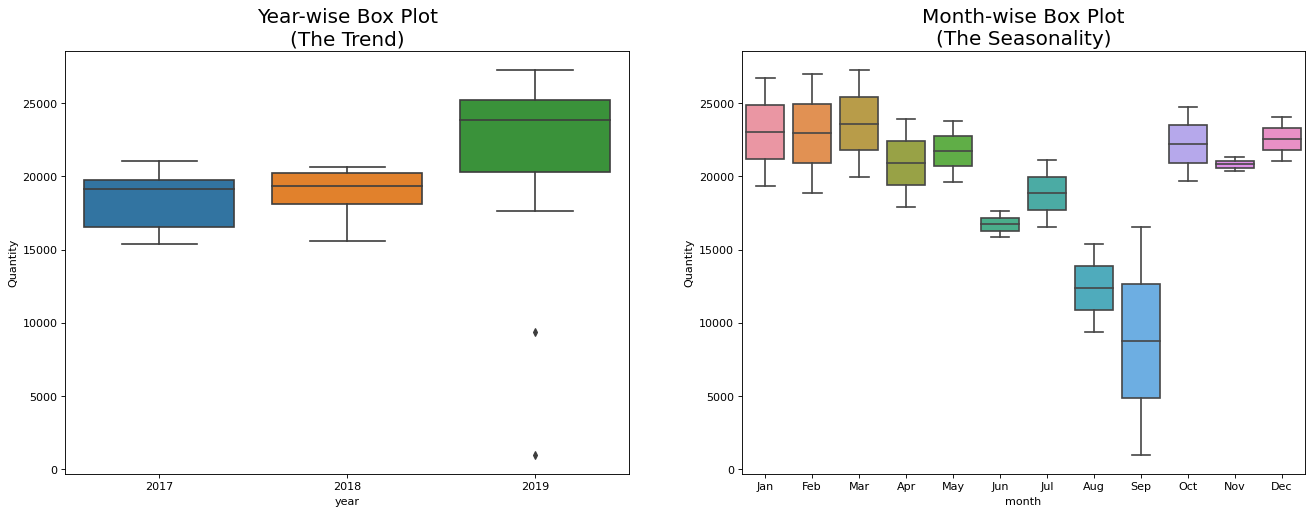

In [ ]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Quantity', data=df_a, ax=axes[0])
sns.boxplot(x='month', y='Quantity', data=df_a.loc[df_a.year.isin([2017, 2019]), :]) #?

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

Checking the data if it is stationary or not:

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df_a['Quantity'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df_a['Quantity'].values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.8191238886678783
p-value: 0.8134399278426852
Critial Values:
   1%, -3.7238633119999998
Critial Values:
   5%, -2.98648896
Critial Values:
   10%, -2.6328004

KPSS Statistic: 0.192635
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


Since the p values is greater than 0.05 the series is not stationary.

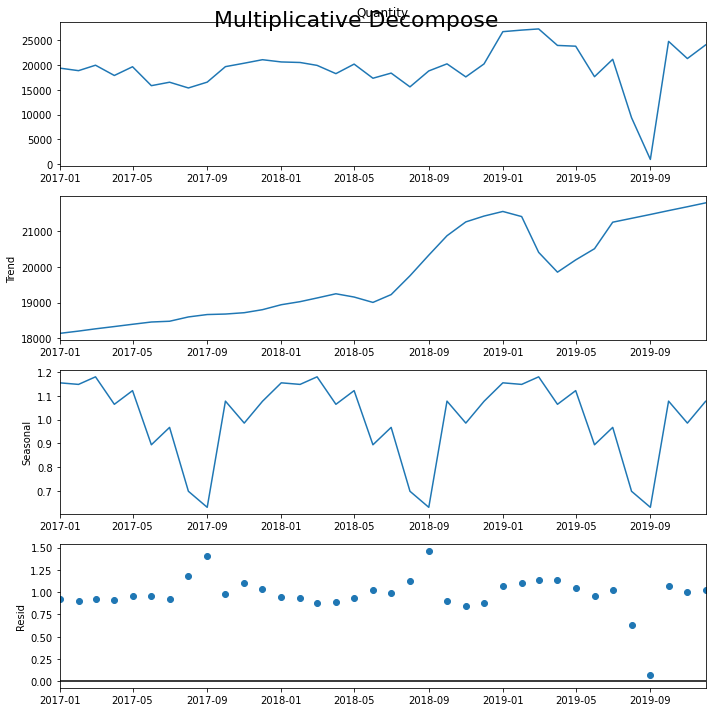

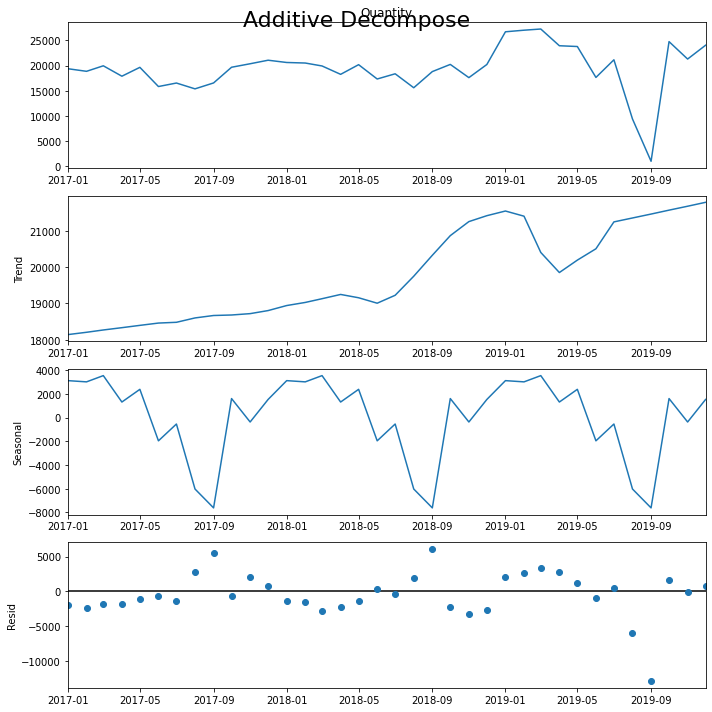

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

df_a = pd.read_csv('gdrive/My Drive/VitrA/ProductX_TS.csv', parse_dates=['Date'], index_col='Date')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df_a['Quantity'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df_a['Quantity'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [ ]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
Date,,,,
2017-01-01,1.154504,18141.321970,0.925076,19375.0
2017-02-01,1.147908,18204.928030,0.902640,18863.0
2017-03-01,1.179699,18268.534091,0.926112,19959.0
2017-04-01,1.064270,18332.140152,0.917000,17891.0
2017-05-01,1.121730,18395.746212,0.952311,19651.0


In [ ]:
df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
Date,,,,
2017-01-01,3117.476698,18141.321970,-1883.798668,19375.0
2017-02-01,3013.983011,18204.928030,-2355.911042,18863.0
2017-03-01,3541.155991,18268.534091,-1850.690082,19959.0
2017-04-01,1313.453971,18332.140152,-1754.594122,17891.0
2017-05-01,2384.210284,18395.746212,-1128.956496,19651.0


In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df_a['Quantity'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df_a['Quantity'].values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.8191238886678783
p-value: 0.8134399278426852
Critial Values:
   1%, -3.7238633119999998
Critial Values:
   5%, -2.98648896
Critial Values:
   10%, -2.6328004

KPSS Statistic: 0.192635
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


In [ ]:
X_train = df_a[0:25]
X_valid = df_a[24:36]

print('X_train Shape', X_train.shape)
print('X_Valid Shape', X_valid.shape)

X_train Shape (25, 1)
X_Valid Shape (12, 1)


Text(0.5, 1.0, 'Quantities detrended by subtracting the least squares fit')

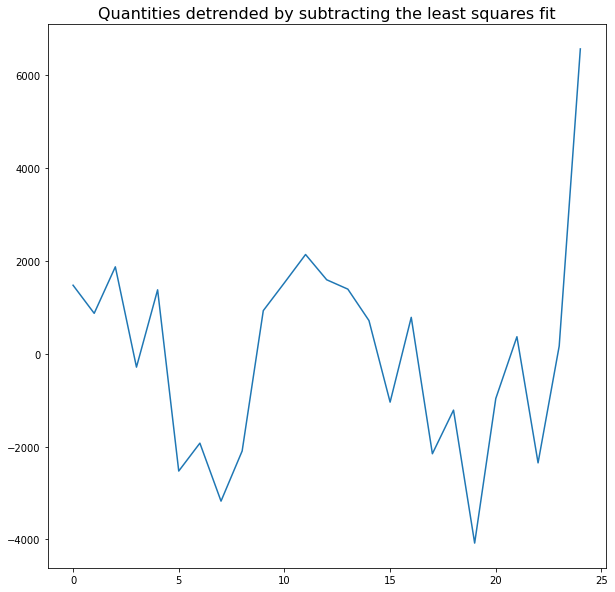

In [ ]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(X_train.Quantity.values)
plt.plot(detrended)
plt.title('Quantities detrended by subtracting the least squares fit', fontsize=16)

Trying to transform the series to stationary with log:

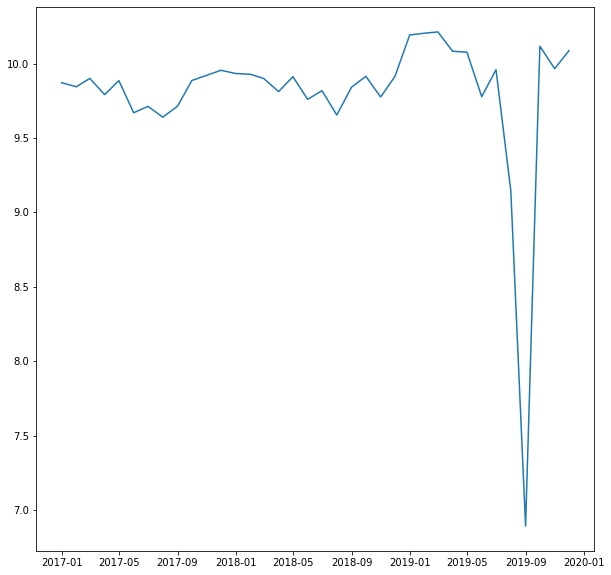

In [ ]:
from numpy import log
from matplotlib import pyplot
logTrans = log(df_a)
pyplot.plot(logTrans)

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(logTrans['Quantity'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(logTrans['Quantity'].values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.12835782322565
p-value: 0.23326569472631403
Critial Values:
   1%, -3.7238633119999998
Critial Values:
   5%, -2.98648896
Critial Values:
   10%, -2.6328004

KPSS Statistic: 0.201758
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


The p-value is still greater than 0.05. So differencing must be applied:

In [ ]:
X_train_st = df_a[0:25]
X_valid_st = df_a[24:36]

print('X_train Shape', X_train.shape)
print('X_Valid Shape', X_valid.shape)

X_train Shape (25, 1)
X_Valid Shape (12, 1)


In [ ]:
X_train_st = X_train_st.diff()
X_train_st.dropna(inplace=True)
X_train_st = X_train_st.diff()
X_train_st.dropna(inplace=True)

In [ ]:
df_stationary = df_a.diff().dropna()
df_stationary

,Quantity
Date,
2017-02-01,-512.0
2017-03-01,1096.0
2017-04-01,-2068.0
2017-05-01,1760.0
2017-06-01,-3812.0
2017-07-01,695.0
2017-08-01,-1156.0
2017-09-01,1174.0
2017-10-01,3119.0


In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df_stationary['Quantity'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df_stationary['Quantity'].values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -3.1141235258739495
p-value: 0.02552548702462708
Critial Values:
   1%, -3.7377092158564813
Critial Values:
   5%, -2.9922162731481485
Critial Values:
   10%, -2.635746736111111

KPSS Statistic: 0.188153
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


The p-value is lower than 0.05.

In [ ]:
X_train_st = df_stationary[0:25]
X_valid_st = df_stationary[24:36]

Text(0.5, 1.0, 'Quantities detrended by subtracting the least squares fit')

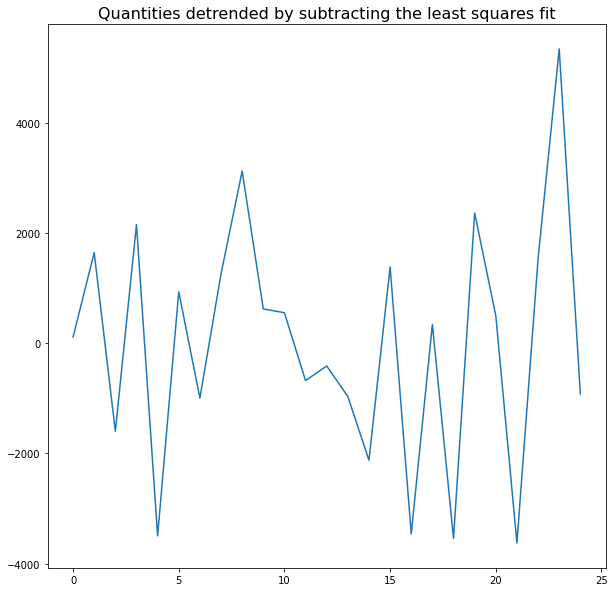

In [ ]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(X_train_st.Quantity.values)
plt.plot(detrended)
plt.title('Quantities detrended by subtracting the least squares fit', fontsize=16)

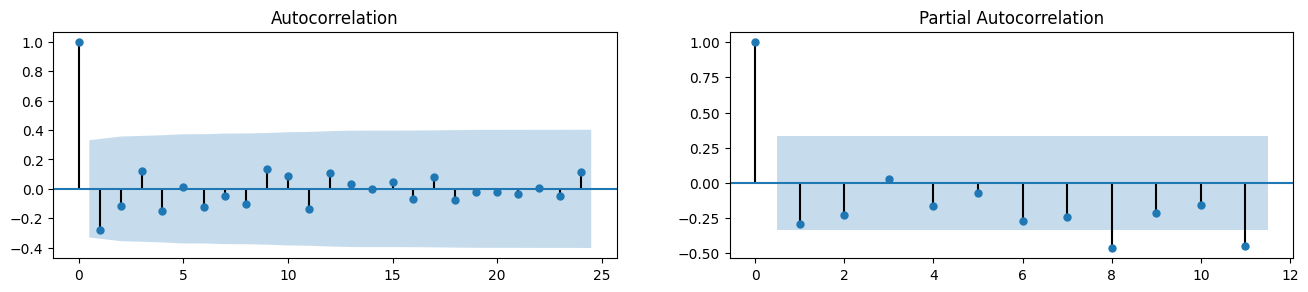

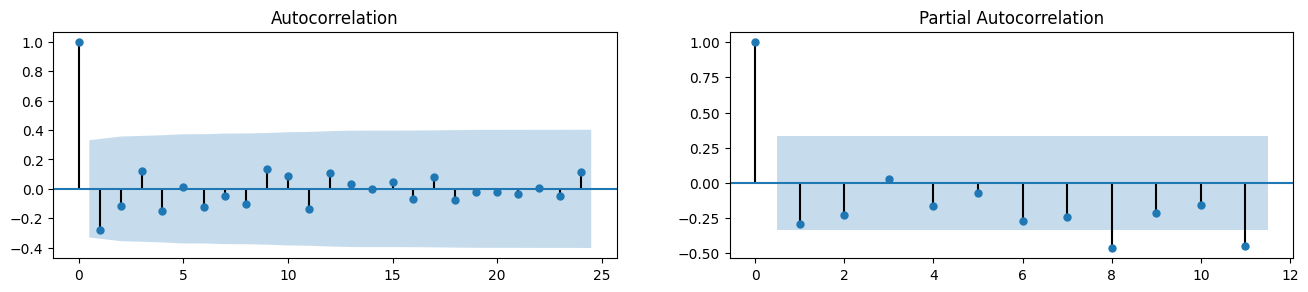

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df_stationary.Quantity.tolist(), lags=24, ax=axes[0])
plot_pacf(df_stationary.Quantity.tolist(),lags=11, ax=axes[1])

In [ ]:
# Setting the Index for 6 years
index_7_years = pd.date_range(X_train_st.index[-1], freq='MS', periods = 12) 

index_7_years

DatetimeIndex(['2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
               '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01',
               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
import itertools
p=d=q=range(0,11)
pdq = list(itertools.product(p,d,q))

for param in pdq:
    try:
        model_arima = ARIMA(X_train_st,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 460.9988338555662
(0, 0, 1) 462.20961322077153
(0, 0, 2) 464.08445870679327
(0, 0, 3) 465.8591723851739
(0, 0, 4) 467.5897132199592
(0, 0, 5) 465.94642473018223
(0, 0, 6) 468.3470306334232
(0, 0, 7) nan
(0, 0, 8) 469.68765555874495
(0, 0, 9) nan
(0, 0, 10) nan
(0, 1, 0) 464.39254086262326
(0, 1, 1) 447.3968445881063
(0, 1, 2) 448.2365958920172
(0, 1, 3) nan
(0, 1, 4) 451.6249033292676
(0, 1, 5) nan
(0, 1, 6) nan
(0, 2, 0) 471.9403057231138
(0, 2, 1) 451.3596574557841
(0, 2, 2) 438.30749769442485
(0, 2, 3) 438.627882465867
(0, 2, 4) 440.49892385145205
(0, 2, 5) 447.8477827572809
(0, 2, 6) nan
(0, 2, 7) 449.26622651948907
(0, 2, 8) nan
(0, 2, 9) 449.2129589384483
(1, 0, 0) 462.13870113251244
(1, 0, 3) 467.78594553675725
(1, 0, 4) 468.4482263626261
(1, 0, 5) 467.5197875520138
(1, 1, 0) 453.75486018009013
(1, 1, 1) 448.11660231058636
(1, 1, 2) 452.1195420091425
(1, 1, 3) 453.5535064659458
(1, 1, 4) 454.01298776955235
(1, 2, 0) 456.8859550289187
(1, 2, 1) 441.9962885116065
(1, 2, 

In [ ]:
from sklearn.metrics import mean_squared_error

# Running ARIMA with random numbers
model_arima = ARIMA(X_train_st, order=(0,2,2)) 
model_arima_fit = model_arima.fit(disp=-1)

# Saving ARIMA predictions
fcast1 = model_arima_fit.forecast(12)[0]

# Passing the same index as the others
fcast1 = pd.Series(fcast1, index=index_7_years)
fcast1 = fcast1.rename("Arima") 
print(fcast1)

# Ploting the predictions
#fig, ax = plt.subplots(figsize=(35,12))
#chart = sns.lineplot(x='Date', y='Quantity', data = X_train)
#chart.set_title('AU')
#fcast1.plot(ax=ax, color='red', marker="o", legend=True)
#X_valid.plot(ax=ax, color='blue', marker="o", legend=True)
print(fcast1.values)
print('The MSE of ARIMA is:', mean_squared_error(X_valid['Quantity'].values, fcast1.values, squared=False))

2019-02-01     2678.866544
2019-03-01     3443.120588
2019-04-01     4223.636922
2019-05-01     5020.415544
2019-06-01     5833.456455
2019-07-01     6662.759656
2019-08-01     7508.325145
2019-09-01     8370.152923
2019-10-01     9248.242990
2019-11-01    10142.595346
2019-12-01    11053.209991
2020-01-01    11980.086924
Freq: MS, Name: Arima, dtype: float64
[ 2678.86654367  3443.12058819  4223.63692165  5020.41554403
  5833.45645533  6662.75965556  7508.32514472  8370.1529228
  9248.24298981 10142.59534574 11053.2099906  11980.08692438]
The MSE of ARIMA is: 16294.93825066021


In [ ]:
X_valid_st

,Quantity
Date,
2019-02-01,316.0
2019-03-01,235.0
2019-04-01,-3324.0
2019-05-01,-154.0
2019-06-01,-6143.0
2019-07-01,3504.0
2019-08-01,-11761.0
2019-09-01,-8405.0
2019-10-01,23777.0


In [ ]:
X_valid_st['Quantity'].values

array([   316.,    235.,  -3324.,   -154.,  -6143.,   3504., -11761.,
        -8405.,  23777.,  -3461.,   2744.])

In [ ]:
# Setting the Index for 6 years
index_4_years = pd.date_range(df_a.index[-1], freq='MS', periods = 5) 

index_4_years

DatetimeIndex(['2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
# Running ARIMA with random numbers
model_arima = ARIMA(X_train_st, order=(0,2,2)) # start 2-0-0 and move to the best
model_arima_fit = model_arima.fit(disp=-1)

# Saving ARIMA predictions
fcast1 = model_arima_fit.forecast(5)[0]

# Passing the same index as the others
fcast1 = pd.Series(fcast1, index=index_4_years)
fcast1 = fcast1.rename("Arima") 
print(fcast1)

2019-12-01    2678.866544
2020-01-01    3443.120588
2020-02-01    4223.636922
2020-03-01    5020.415544
2020-04-01    5833.456455
Freq: MS, Name: Arima, dtype: float64


In [ ]:
# Running auto ARIMA 
auto_arima_model = pm.auto_arima(df_a, seasonal=False, m=5)

# Read more about setting m
# https://alkaline-ml.com/pmdarima/tips_and_tricks.html

# make your forecasts
fcast2 = auto_arima_model.predict(5) 
fcast2 = pd.Series(fcast2, index=index_4_years)
fcast2 = fcast2.rename("Auto Arima")
print(fcast2)

2019-12-01    21158.915482
2020-01-01    20071.964040
2020-02-01    19662.598539
2020-03-01    19508.424113
2020-04-01    19450.359246
Freq: MS, Name: Auto Arima, dtype: float64


The 2020 predictions with Auto ARIMA are similar to the ones with machine learning algorithms. So these are selected as the final results for time series model.

In [ ]:
df_base = pd.concat([df_a,df_a.shift(1)],axis=1)

In [ ]:
df_base.dropna(inplace=True)

In [ ]:
df_base.columns = ['Quantity','Shifted']
df_base

,Quantity,Shifted
Date,,
2017-02-01,18863,19375.0
2017-03-01,19959,18863.0
2017-04-01,17891,19959.0
2017-05-01,19651,17891.0
2017-06-01,15839,19651.0
2017-07-01,16534,15839.0
2017-08-01,15378,16534.0
2017-09-01,16552,15378.0
2017-10-01,19671,16552.0


Summations of Quantity and Shifted values are much more greater than the ones previos models and the actual 2017-2019 sales. So this part of the model is neglected.

In [ ]:
df_base['Value'] = df_base['Quantity']+df_base['Shifted']
df_base

,Quantity,Shifted,Value
Date,,,
2017-02-01,18863,19375.0,-512.0
2017-03-01,19959,18863.0,1096.0
2017-04-01,17891,19959.0,-2068.0
2017-05-01,19651,17891.0,1760.0
2017-06-01,15839,19651.0,-3812.0
2017-07-01,16534,15839.0,695.0
2017-08-01,15378,16534.0,-1156.0
2017-09-01,16552,15378.0,1174.0
2017-10-01,19671,16552.0,3119.0


In [ ]:
df_base.drop(['Quantity','Shifted'],axis=1,inplace=True)
df_base

,Value
Date,
2017-02-01,-512.0
2017-03-01,1096.0
2017-04-01,-2068.0
2017-05-01,1760.0
2017-06-01,-3812.0
2017-07-01,695.0
2017-08-01,-1156.0
2017-09-01,1174.0
2017-10-01,3119.0


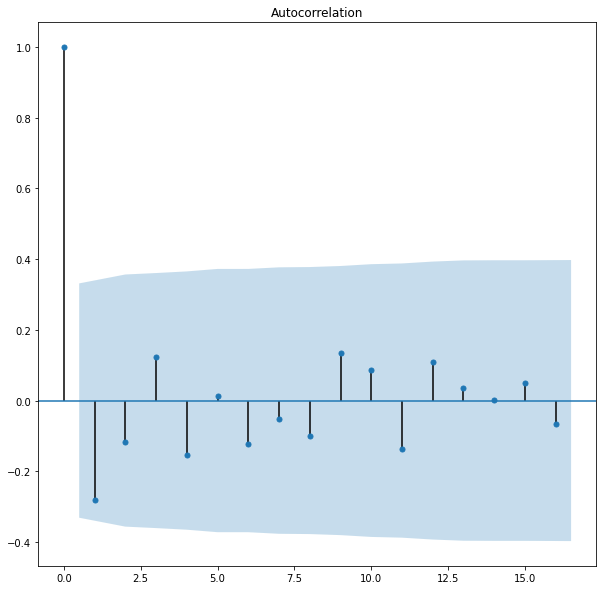

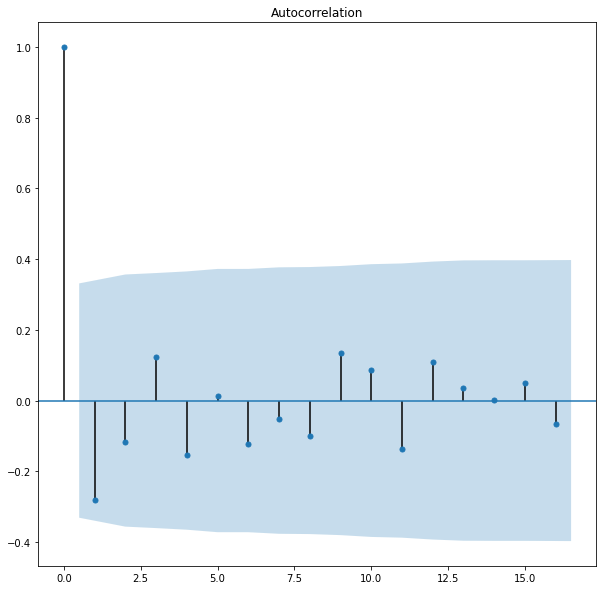

In [ ]:
plot_acf(df_base)

# **KERAS**

Since the desired results could not be obtained from machine learning algorithms and time series methods, the analyzes were also tested with KERAS. However there was no improvement in the results compared to other models.

In [ ]:
# Building model:

from keras import models
from keras import layers
def build_model():

  model = models.Sequential()
  model.add(layers.Dense(50, activation='relu',
                         input_shape=(X_train_1.shape[1],)))
  model.add(layers.Dense(50, activation='relu'))
  model.add(layers.Dense(50, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='Adam', loss='mse', metrics=['mae'])
  return model

In [ ]:
# K-Fold cross validation:

import numpy as np
k = 3
num_val_samples = len(X_train_1) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print('processing fold #', i)
  # Prepare the validation data: data from partition # k
  val_data = X_train_1[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = y_train_1[i * num_val_samples: (i + 1) * num_val_samples]
  # Prepare the training data: data from all other partitions
  partial_train_data = np.concatenate(
      [X_train_1[:i * num_val_samples],
       X_train_1[(i + 1) * num_val_samples:]],
       axis=0)
  partial_train_targets = np.concatenate(
      [y_train_1[:i * num_val_samples],
       y_train_1[(i + 1) * num_val_samples:]],
       axis=0)
  # Build the Keras model (already compiled)
  model = build_model()
  # Train the model (in silent mode, verbose=0)
  model.fit(partial_train_data, partial_train_targets,
            epochs=num_epochs, batch_size=1, verbose=0)
  # Evaluate the model on the validation data
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2


In [ ]:
print(all_scores)
np.mean(all_scores)

[93.53020477294922, 93.29318237304688, 135.75538635253906]


107.52625783284505

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)
  # Prepare the validation data: data from partition # k
  val_data = X_train_1[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = y_train_1[i * num_val_samples: (i + 1) * num_val_samples]
  # Prepare the training data: data from all other partitions
  partial_train_data = np.concatenate(
      [X_train_1[:i * num_val_samples],
       X_train_1[(i + 1) * num_val_samples:]],
       axis=0)
  partial_train_targets = np.concatenate(
      [y_train_1[:i * num_val_samples],
       y_train_1[(i + 1) * num_val_samples:]],
       axis=0)
  # Build the Keras model (already compiled)
  model = build_model()
  # Train the model (in silent mode, verbose=0)
  history = model.fit(partial_train_data, partial_train_targets,
                      validation_data=(val_data, val_targets),
                      epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2


In [ ]:
# Averaging K-fold validation scores

average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

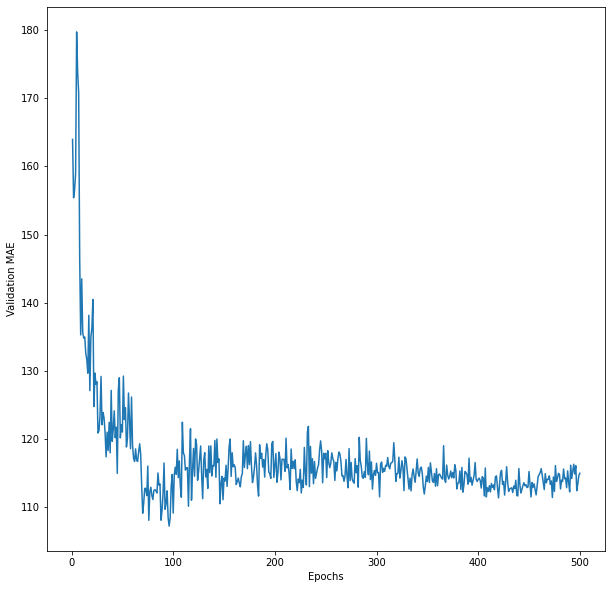

In [ ]:
# Plotting validation scores

import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

It can be seen that on 75-th100th epoch Mean Absolute Error of validation stops to improve. So the model will be build with that information:

In [ ]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(X_train_1, y_train_1,
          epochs=100, batch_size=32, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_test_1, y_test_1)

19/19 [==============================] - 0s 1ms/step - loss: 88396.5312 - mae: 144.3741


Since there was no promising improvement in the results despite long operation time compared to other methods, neural networks with KERAS were not further examined and not reported in the main presentation.